In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import os

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [4]:
# 그래프에서 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [5]:
np.set_printoptions(precision=3)            # 소수점 3번째 자리에서 반올림
pd.set_option('display.max_rows', None)     # Row 생략없이 출력
pd.set_option('display.max_columns', None)  # Column 생략없이 출력
pd.set_option('display.max_colwidth', None) # 컬럼의 내용이 길어도 생략없이 출력
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.5f}'.format) # 8.500000e+01 이런 형식의 지수표현을 하고 싶지 않을 경우

In [6]:
# 사용할 색상 테마 설정
oil_color = "#e67e22"  # 주황색
materials_color = '#27ae60'  # 녹색
trend_color = '#9b59b6'   # 보라색
seasonal_color = '#f39c12'  # 주황색
resid_color = '#1abc9c'   # 청록색
diff_color = '#e74c3c'    # 붉은색

# 엑셀판

In [26]:
df_oil = pd.read_excel("./유가_원자재.xlsx", engine = "openpyxl", header = 0)
df_oil

,Unnamed: 0,Unnamed: 1,2015.01 월,2015.02 월,2015.03 월,2015.04 월,2015.05 월,2015.06 월,2015.07 월,2015.08 월,2015.09 월,2015.10 월,2015.11 월,2015.12 월,2016.01 월,2016.02 월,2016.03 월,2016.04 월,2016.05 월,2016.06 월,2016.07 월,2016.08 월,2016.09 월,2016.10 월,2016.11 월,2016.12 월,2017.01 월,2017.02 월,2017.03 월,2017.04 월,2017.05 월,2017.06 월,2017.07 월,2017.08 월,2017.09 월,2017.10 월,2017.11 월,2017.12 월,2018.01 월,2018.02 월,2018.03 월,2018.04 월,2018.05 월,2018.06 월,2018.07 월,2018.08 월,2018.09 월,2018.10 월,2018.11 월,2018.12 월,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,2019.10 월,2019.11 월,2019.12 월,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,2020.08 월,2020.09 월,2020.10 월,2020.11 월,2020.12 월,2021.01 월,2021.02 월,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,2022.12 월,2023.01 월,2023.02 월,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월,2024.07 월,2024.08 월,2024.09 월,2024.10 월,2024.11 월,2024.12 월
0,유가,배럴당 달러,47.22000,50.58000,47.82000,54.45000,59.27000,59.82000,50.90000,42.87000,45.48000,46.22000,42.44000,37.19000,31.68000,30.32000,37.55000,40.75000,46.71000,48.76000,44.65000,44.72000,45.18000,49.78000,45.66000,51.97000,52.50000,53.47000,49.33000,51.06000,48.48000,45.18000,46.63000,48.04000,49.82000,51.58000,56.64000,57.88000,63.70000,62.23000,62.73000,66.25000,69.98000,67.87000,70.98000,68.06000,70.23000,70.75000,56.96000,49.52000,51.38000,54.95000,58.15000,63.86000,60.83000,54.66000,57.35000,54.81000,56.95000,53.96000,57.03000,59.88000,57.52000,50.54000,29.21000,16.55000,28.56000,38.31000,40.71000,42.34000,39.63000,39.40000,40.94000,47.02000,52.00000,59.04000,62.33000,61.72000,65.17000,71.38000,72.49000,67.73000,71.65000,81.48000,79.15000,71.71000,83.22000,91.64000,108.50000,101.78000,109.55000,114.84000,101.62000,93.67000,84.26000,87.55000,84.37000,76.44000,78.12000,76.83000,73.28000,79.45000,71.58000,70.25000,76.07000,81.39000,89.43000,85.64000,77.69000,71.90000,74.15000,77.25000,81.28000,85.35000,80.02000,79.77000,81.80000,76.68000,70.24000,71.99000,69.95000,70.12000
1,팜오일,MYR/T,2146.00000,2305.00000,2165.00000,2102.00000,2216.00000,2229.00000,2120.00000,1991.00000,2375.00000,2363.00000,2344.00000,2485.00000,2443.00000,2548.00000,2725.00000,2593.00000,2620.00000,2353.00000,2316.00000,2526.00000,2636.00000,2763.00000,3073.00000,3109.00000,3029.00000,2770.00000,2646.00000,2508.00000,2499.00000,2459.00000,2675.00000,2706.00000,2695.00000,2815.00000,2603.00000,2503.00000,2492.00000,2559.00000,2425.00000,2362.00000,2429.00000,2326.00000,2194.00000,2248.00000,2174.00000,2150.00000,2040.00000,2121.00000,2299.00000,2121.00000,2106.00000,2095.00000,2069.00000,1951.00000,2070.00000,2234.00000,2135.00000,2485.00000,2744.00000,3052.00000,2604.00000,2319.00000,2402.00000,2088.00000,2292.00000,2297.00000,2677.00000,2738.00000,2714.00000,3011.00000,3305.00000,3600.00000,3490.00000,3742.00000,3612.00000,3868.00000,3919.00000,3599.00000,4369.00000,4254.00000,4595.00000,5026.00000,4672.00000,4697.00000,5592.00000,6299.00000,5705.00000,7104.00000,6304.00000,4910.00000,4289.00000,4144.00000,3416.00000,4054.00000,4234.00000,4174.00000,3815.00000,4142.00000,3761.00000,3338.00000,3201.00000,3789.00000,3878.00000,4010.00000,3767.00000,3679.00000,3895.00000,3721.00000,3798.00000,3970.00000,4266.00000,3814.00000,4079.00000,3916.00000,3909.00000,3978.00000,3998.00000,4695.00000,5023.00000,4444.00000
2,나프타,배럴당 달러,504.57000,504.57000,504.57000,563.40000,563.40000,563.40000,461.16000,461.16000,461.16000,446.36000,446.36000,446.36000,346.71000,346.71000,346.71000,412.20000,412.20000,412.20000,390.92000,390.92000,390.92000,450.29000,450.29000,450.29000,500.81000,500.81000,500.81000,445.30000,445.30000,445.30000,467.95000,467.95000,467.95000,574.0

In [27]:
df_oil.isnull().sum()

Unnamed: 0    0
Unnamed: 1    0
2015.01 월     0
2015.02 월     0
2015.03 월     0
2015.04 월     0
2015.05 월     0
2015.06 월     0
2015.07 월     0
2015.08 월     0
2015.09 월     0
2015.10 월     0
2015.11 월     0
2015.12 월     0
2016.01 월     0
2016.02 월     0
2016.03 월     0
2016.04 월     0
2016.05 월     0
2016.06 월     0
2016.07 월     0
2016.08 월     0
2016.09 월     0
2016.10 월     0
2016.11 월     0
2016.12 월     0
2017.01 월     0
2017.02 월     0
2017.03 월     0
2017.04 월     0
2017.05 월     0
2017.06 월     0
2017.07 월     0
2017.08 월     0
2017.09 월     0
2017.10 월     0
2017.11 월     0
2017.12 월     0
2018.01 월     0
2018.02 월     0
2018.03 월     0
2018.04 월     0
2018.05 월     0
2018.06 월     0
2018.07 월     0
2018.08 월     0
2018.09 월     0
2018.10 월     0
2018.11 월     0
2018.12 월     0
2019.01 월     0
2019.02 월     0
2019.03 월     0
2019.04 월     0
2019.05 월     0
2019.06 월     0
2019.07 월     0
2019.08 월     0
2019.09 월     0
2019.10 월     0
2019.11 월     0
2019.12 월     0
2020.01 

In [28]:
# 제거할 컬럼 패턴 정의 (Unnamed: 0은 제외)
unit_patterns = ['배럴당', '달러', 'MYR/T', 'USD', '$/barrel', '단위', 'unit']
columns_to_drop = []

In [29]:
for col in df_oil.columns:
    col_str = str(col).lower()
    # Unnamed: 0은 보존 (유가/원자재 종류 정보)
    if col_str == 'unnamed: 0':
        continue
    # 다른 Unnamed 컬럼들과 단위 관련 키워드가 포함된 컬럼 찾기
    elif ('unnamed:' in col_str and 'unnamed: 0' not in col_str) or any(pattern.lower() in col_str for pattern in unit_patterns):
        columns_to_drop.append(col)
    # 완전히 비어있는 컬럼 찾기
    elif df_oil[col].isna().all():
        columns_to_drop.append(col)

print(f"제거할 컬럼: {columns_to_drop}")

제거할 컬럼: ['Unnamed: 1']


In [30]:
# 불필요한 컬럼 제거
df_oil = df_oil.drop(columns=columns_to_drop, errors='ignore')

In [31]:
df_oil

,Unnamed: 0,2015.01 월,2015.02 월,2015.03 월,2015.04 월,2015.05 월,2015.06 월,2015.07 월,2015.08 월,2015.09 월,2015.10 월,2015.11 월,2015.12 월,2016.01 월,2016.02 월,2016.03 월,2016.04 월,2016.05 월,2016.06 월,2016.07 월,2016.08 월,2016.09 월,2016.10 월,2016.11 월,2016.12 월,2017.01 월,2017.02 월,2017.03 월,2017.04 월,2017.05 월,2017.06 월,2017.07 월,2017.08 월,2017.09 월,2017.10 월,2017.11 월,2017.12 월,2018.01 월,2018.02 월,2018.03 월,2018.04 월,2018.05 월,2018.06 월,2018.07 월,2018.08 월,2018.09 월,2018.10 월,2018.11 월,2018.12 월,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,2019.10 월,2019.11 월,2019.12 월,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,2020.08 월,2020.09 월,2020.10 월,2020.11 월,2020.12 월,2021.01 월,2021.02 월,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,2022.12 월,2023.01 월,2023.02 월,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월,2024.07 월,2024.08 월,2024.09 월,2024.10 월,2024.11 월,2024.12 월
0,유가,47.22000,50.58000,47.82000,54.45000,59.27000,59.82000,50.90000,42.87000,45.48000,46.22000,42.44000,37.19000,31.68000,30.32000,37.55000,40.75000,46.71000,48.76000,44.65000,44.72000,45.18000,49.78000,45.66000,51.97000,52.50000,53.47000,49.33000,51.06000,48.48000,45.18000,46.63000,48.04000,49.82000,51.58000,56.64000,57.88000,63.70000,62.23000,62.73000,66.25000,69.98000,67.87000,70.98000,68.06000,70.23000,70.75000,56.96000,49.52000,51.38000,54.95000,58.15000,63.86000,60.83000,54.66000,57.35000,54.81000,56.95000,53.96000,57.03000,59.88000,57.52000,50.54000,29.21000,16.55000,28.56000,38.31000,40.71000,42.34000,39.63000,39.40000,40.94000,47.02000,52.00000,59.04000,62.33000,61.72000,65.17000,71.38000,72.49000,67.73000,71.65000,81.48000,79.15000,71.71000,83.22000,91.64000,108.50000,101.78000,109.55000,114.84000,101.62000,93.67000,84.26000,87.55000,84.37000,76.44000,78.12000,76.83000,73.28000,79.45000,71.58000,70.25000,76.07000,81.39000,89.43000,85.64000,77.69000,71.90000,74.15000,77.25000,81.28000,85.35000,80.02000,79.77000,81.80000,76.68000,70.24000,71.99000,69.95000,70.12000
1,팜오일,2146.00000,2305.00000,2165.00000,2102.00000,2216.00000,2229.00000,2120.00000,1991.00000,2375.00000,2363.00000,2344.00000,2485.00000,2443.00000,2548.00000,2725.00000,2593.00000,2620.00000,2353.00000,2316.00000,2526.00000,2636.00000,2763.00000,3073.00000,3109.00000,3029.00000,2770.00000,2646.00000,2508.00000,2499.00000,2459.00000,2675.00000,2706.00000,2695.00000,2815.00000,2603.00000,2503.00000,2492.00000,2559.00000,2425.00000,2362.00000,2429.00000,2326.00000,2194.00000,2248.00000,2174.00000,2150.00000,2040.00000,2121.00000,2299.00000,2121.00000,2106.00000,2095.00000,2069.00000,1951.00000,2070.00000,2234.00000,2135.00000,2485.00000,2744.00000,3052.00000,2604.00000,2319.00000,2402.00000,2088.00000,2292.00000,2297.00000,2677.00000,2738.00000,2714.00000,3011.00000,3305.00000,3600.00000,3490.00000,3742.00000,3612.00000,3868.00000,3919.00000,3599.00000,4369.00000,4254.00000,4595.00000,5026.00000,4672.00000,4697.00000,5592.00000,6299.00000,5705.00000,7104.00000,6304.00000,4910.00000,4289.00000,4144.00000,3416.00000,4054.00000,4234.00000,4174.00000,3815.00000,4142.00000,3761.00000,3338.00000,3201.00000,3789.00000,3878.00000,4010.00000,3767.00000,3679.00000,3895.00000,3721.00000,3798.00000,3970.00000,4266.00000,3814.00000,4079.00000,3916.00000,3909.00000,3978.00000,3998.00000,4695.00000,5023.00000,4444.00000
2,나프타,504.57000,504.57000,504.57000,563.40000,563.40000,563.40000,461.16000,461.16000,461.16000,446.36000,446.36000,446.36000,346.71000,346.71000,346.71000,412.20000,412.20000,412.20000,390.92000,390.92000,390.92000,450.29000,450.29000,450.29000,500.81000,500.81000,500.81000,445.30000,445.30000,445.30000,467.95000,467.95000,467.95000,574.03000,574.03000,574.03000,584.53

In [32]:
if not df_oil['Unnamed: 0'].isnull().all():
    df_oil = df_oil.rename(columns={'Unnamed: 0': '품목명'})
    print("'Unnamed: 0'을 '품목명'으로 변경했습니다.")
else:
    print("'Unnamed: 0' 컬럼이 모두 비어있어서 제거합니다.")
    df_oil = df_oil.drop(columns=['Unnamed: 0'])

'Unnamed: 0'을 '품목명'으로 변경했습니다.


In [33]:
# 데이터 구조 재확인
print(f"\n최종 데이터 구조:")
print(f"열 이름: {df_oil.columns.tolist()}")
print(f"데이터 타입:\n{df_oil.dtypes}")
print(f"처음 5행:\n{df_oil.head()}")


최종 데이터 구조:
열 이름: ['품목명', '2015.01 월', '2015.02 월', '2015.03 월', '2015.04 월', '2015.05 월', '2015.06 월', '2015.07 월', '2015.08 월', '2015.09 월', '2015.10 월', '2015.11 월', '2015.12 월', '2016.01 월', '2016.02 월', '2016.03 월', '2016.04 월', '2016.05 월', '2016.06 월', '2016.07 월', '2016.08 월', '2016.09 월', '2016.10 월', '2016.11 월', '2016.12 월', '2017.01 월', '2017.02 월', '2017.03 월', '2017.04 월', '2017.05 월', '2017.06 월', '2017.07 월', '2017.08 월', '2017.09 월', '2017.10 월', '2017.11 월', '2017.12 월', '2018.01 월', '2018.02 월', '2018.03 월', '2018.04 월', '2018.05 월', '2018.06 월', '2018.07 월', '2018.08 월', '2018.09 월', '2018.10 월', '2018.11 월', '2018.12 월', '2019.01 월', '2019.02 월', '2019.03 월', '2019.04 월', '2019.05 월', '2019.06 월', '2019.07 월', '2019.08 월', '2019.09 월', '2019.10 월', '2019.11 월', '2019.12 월', '2020.01 월', '2020.02 월', '2020.03 월', '2020.04 월', '2020.05 월', '2020.06 월', '2020.07 월', '2020.08 월', '2020.09 월', '2020.10 월', '2020.11 월', '2020.12 월', '2021.01 월', '2021.02 월', '2021.03 월',

In [34]:
df_oil

,품목명,2015.01 월,2015.02 월,2015.03 월,2015.04 월,2015.05 월,2015.06 월,2015.07 월,2015.08 월,2015.09 월,2015.10 월,2015.11 월,2015.12 월,2016.01 월,2016.02 월,2016.03 월,2016.04 월,2016.05 월,2016.06 월,2016.07 월,2016.08 월,2016.09 월,2016.10 월,2016.11 월,2016.12 월,2017.01 월,2017.02 월,2017.03 월,2017.04 월,2017.05 월,2017.06 월,2017.07 월,2017.08 월,2017.09 월,2017.10 월,2017.11 월,2017.12 월,2018.01 월,2018.02 월,2018.03 월,2018.04 월,2018.05 월,2018.06 월,2018.07 월,2018.08 월,2018.09 월,2018.10 월,2018.11 월,2018.12 월,2019.01 월,2019.02 월,2019.03 월,2019.04 월,2019.05 월,2019.06 월,2019.07 월,2019.08 월,2019.09 월,2019.10 월,2019.11 월,2019.12 월,2020.01 월,2020.02 월,2020.03 월,2020.04 월,2020.05 월,2020.06 월,2020.07 월,2020.08 월,2020.09 월,2020.10 월,2020.11 월,2020.12 월,2021.01 월,2021.02 월,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,2022.12 월,2023.01 월,2023.02 월,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월,2024.07 월,2024.08 월,2024.09 월,2024.10 월,2024.11 월,2024.12 월
0,유가,47.22000,50.58000,47.82000,54.45000,59.27000,59.82000,50.90000,42.87000,45.48000,46.22000,42.44000,37.19000,31.68000,30.32000,37.55000,40.75000,46.71000,48.76000,44.65000,44.72000,45.18000,49.78000,45.66000,51.97000,52.50000,53.47000,49.33000,51.06000,48.48000,45.18000,46.63000,48.04000,49.82000,51.58000,56.64000,57.88000,63.70000,62.23000,62.73000,66.25000,69.98000,67.87000,70.98000,68.06000,70.23000,70.75000,56.96000,49.52000,51.38000,54.95000,58.15000,63.86000,60.83000,54.66000,57.35000,54.81000,56.95000,53.96000,57.03000,59.88000,57.52000,50.54000,29.21000,16.55000,28.56000,38.31000,40.71000,42.34000,39.63000,39.40000,40.94000,47.02000,52.00000,59.04000,62.33000,61.72000,65.17000,71.38000,72.49000,67.73000,71.65000,81.48000,79.15000,71.71000,83.22000,91.64000,108.50000,101.78000,109.55000,114.84000,101.62000,93.67000,84.26000,87.55000,84.37000,76.44000,78.12000,76.83000,73.28000,79.45000,71.58000,70.25000,76.07000,81.39000,89.43000,85.64000,77.69000,71.90000,74.15000,77.25000,81.28000,85.35000,80.02000,79.77000,81.80000,76.68000,70.24000,71.99000,69.95000,70.12000
1,팜오일,2146.00000,2305.00000,2165.00000,2102.00000,2216.00000,2229.00000,2120.00000,1991.00000,2375.00000,2363.00000,2344.00000,2485.00000,2443.00000,2548.00000,2725.00000,2593.00000,2620.00000,2353.00000,2316.00000,2526.00000,2636.00000,2763.00000,3073.00000,3109.00000,3029.00000,2770.00000,2646.00000,2508.00000,2499.00000,2459.00000,2675.00000,2706.00000,2695.00000,2815.00000,2603.00000,2503.00000,2492.00000,2559.00000,2425.00000,2362.00000,2429.00000,2326.00000,2194.00000,2248.00000,2174.00000,2150.00000,2040.00000,2121.00000,2299.00000,2121.00000,2106.00000,2095.00000,2069.00000,1951.00000,2070.00000,2234.00000,2135.00000,2485.00000,2744.00000,3052.00000,2604.00000,2319.00000,2402.00000,2088.00000,2292.00000,2297.00000,2677.00000,2738.00000,2714.00000,3011.00000,3305.00000,3600.00000,3490.00000,3742.00000,3612.00000,3868.00000,3919.00000,3599.00000,4369.00000,4254.00000,4595.00000,5026.00000,4672.00000,4697.00000,5592.00000,6299.00000,5705.00000,7104.00000,6304.00000,4910.00000,4289.00000,4144.00000,3416.00000,4054.00000,4234.00000,4174.00000,3815.00000,4142.00000,3761.00000,3338.00000,3201.00000,3789.00000,3878.00000,4010.00000,3767.00000,3679.00000,3895.00000,3721.00000,3798.00000,3970.00000,4266.00000,3814.00000,4079.00000,3916.00000,3909.00000,3978.00000,3998.00000,4695.00000,5023.00000,4444.00000
2,나프타,504.57000,504.57000,504.57000,563.40000,563.40000,563.40000,461.16000,461.16000,461.16000,446.36000,446.36000,446.36000,346.71000,346.71000,346.71000,412.20000,412.20000,412.20000,390.92000,390.92000,390.92000,450.29000,450.29000,450.29000,500.81000,500.81000,500.81000,445.30000,445.30000,445.30000,467.95000,467.95000,467.95000,574.03000,574.03000,574.03000,584.53000,584

In [35]:
# 넓은 형식 -> 긴 형식 변환 (Melt)
print("=== 데이터 변환: 넓은 형식 -> 긴 형식 ===")

=== 데이터 변환: 넓은 형식 -> 긴 형식 ===


In [36]:
# 컬럼 확인 및 디버깅
print("현재 컬럼 리스트:")
print(df_oil.columns.tolist())

print(f"\n전체 컬럼 개수: {len(df_oil.columns)}")

현재 컬럼 리스트:
['품목명', '2015.01 월', '2015.02 월', '2015.03 월', '2015.04 월', '2015.05 월', '2015.06 월', '2015.07 월', '2015.08 월', '2015.09 월', '2015.10 월', '2015.11 월', '2015.12 월', '2016.01 월', '2016.02 월', '2016.03 월', '2016.04 월', '2016.05 월', '2016.06 월', '2016.07 월', '2016.08 월', '2016.09 월', '2016.10 월', '2016.11 월', '2016.12 월', '2017.01 월', '2017.02 월', '2017.03 월', '2017.04 월', '2017.05 월', '2017.06 월', '2017.07 월', '2017.08 월', '2017.09 월', '2017.10 월', '2017.11 월', '2017.12 월', '2018.01 월', '2018.02 월', '2018.03 월', '2018.04 월', '2018.05 월', '2018.06 월', '2018.07 월', '2018.08 월', '2018.09 월', '2018.10 월', '2018.11 월', '2018.12 월', '2019.01 월', '2019.02 월', '2019.03 월', '2019.04 월', '2019.05 월', '2019.06 월', '2019.07 월', '2019.08 월', '2019.09 월', '2019.10 월', '2019.11 월', '2019.12 월', '2020.01 월', '2020.02 월', '2020.03 월', '2020.04 월', '2020.05 월', '2020.06 월', '2020.07 월', '2020.08 월', '2020.09 월', '2020.10 월', '2020.11 월', '2020.12 월', '2021.01 월', '2021.02 월', '2021.03 월', '2021.

In [37]:
# 각 컬럼별로 조건 확인
print("\n각 컬럼별 조건 확인:")
for col in df_oil.columns:
    has_dot = '.' in str(col)
    has_month = '월' in str(col)
    print(f"'{col}' -> '.' 포함: {has_dot}, '월' 포함: {has_month}")


각 컬럼별 조건 확인:
'품목명' -> '.' 포함: False, '월' 포함: False
'2015.01 월' -> '.' 포함: True, '월' 포함: True
'2015.02 월' -> '.' 포함: True, '월' 포함: True
'2015.03 월' -> '.' 포함: True, '월' 포함: True
'2015.04 월' -> '.' 포함: True, '월' 포함: True
'2015.05 월' -> '.' 포함: True, '월' 포함: True
'2015.06 월' -> '.' 포함: True, '월' 포함: True
'2015.07 월' -> '.' 포함: True, '월' 포함: True
'2015.08 월' -> '.' 포함: True, '월' 포함: True
'2015.09 월' -> '.' 포함: True, '월' 포함: True
'2015.10 월' -> '.' 포함: True, '월' 포함: True
'2015.11 월' -> '.' 포함: True, '월' 포함: True
'2015.12 월' -> '.' 포함: True, '월' 포함: True
'2016.01 월' -> '.' 포함: True, '월' 포함: True
'2016.02 월' -> '.' 포함: True, '월' 포함: True
'2016.03 월' -> '.' 포함: True, '월' 포함: True
'2016.04 월' -> '.' 포함: True, '월' 포함: True
'2016.05 월' -> '.' 포함: True, '월' 포함: True
'2016.06 월' -> '.' 포함: True, '월' 포함: True
'2016.07 월' -> '.' 포함: True, '월' 포함: True
'2016.08 월' -> '.' 포함: True, '월' 포함: True
'2016.09 월' -> '.' 포함: True, '월' 포함: True
'2016.10 월' -> '.' 포함: True, '월' 포함: True
'2016.11 월' -> '.' 포함: T

In [38]:
# 날짜 컬럼 찾기 ('2015.01 월' 형태) - 품목명 제외
date_cols = [col for col in df_oil.columns if col != '품목명']
print(f"\n품목명 제외한 컬럼들: {len(date_cols)}개")
print(f"처음 5개: {date_cols[:5]}")


품목명 제외한 컬럼들: 120개
처음 5개: ['2015.01 월', '2015.02 월', '2015.03 월', '2015.04 월', '2015.05 월']


In [39]:
# 조건별로 다시 확인
dot_cols = [col for col in df_oil.columns if '.' in str(col)]
month_cols = [col for col in df_oil.columns if '월' in str(col)]
both_cols = [col for col in df_oil.columns if '.' in str(col) and '월' in str(col)]

print(f"\n'.' 포함 컬럼: {len(dot_cols)}개")
print(f"'월' 포함 컬럼: {len(month_cols)}개") 
print(f"둘 다 포함 컬럼: {len(both_cols)}개")

if len(both_cols) > 0:
    print(f"둘 다 포함 컬럼 예시: {both_cols[:5]}")
    date_cols = both_cols
else:
    # 품목명만 제외하고 나머지를 날짜 컬럼으로 사용
    date_cols = [col for col in df_oil.columns if col != '품목명']
    print("조건에 맞는 컬럼이 없어서 품목명 제외한 모든 컬럼을 날짜 컬럼으로 사용")

print(f"\n최종 날짜 컬럼 개수: {len(date_cols)}")
print(f"날짜 컬럼 예시: {date_cols[:5] if len(date_cols) > 0 else '없음'}")


'.' 포함 컬럼: 120개
'월' 포함 컬럼: 120개
둘 다 포함 컬럼: 120개
둘 다 포함 컬럼 예시: ['2015.01 월', '2015.02 월', '2015.03 월', '2015.04 월', '2015.05 월']

최종 날짜 컬럼 개수: 120
날짜 컬럼 예시: ['2015.01 월', '2015.02 월', '2015.03 월', '2015.04 월', '2015.05 월']


In [40]:
# melt 변환
df_oil_long = pd.melt(df_oil, 
                     id_vars=['품목명'], 
                     value_vars=date_cols, 
                     var_name='날짜', 
                     value_name='가격')

print(f"\n변환 후 데이터 크기: {df_oil_long.shape}")
print("\n변환된 데이터 처음 5행:")
print(df_oil_long.head())


변환 후 데이터 크기: (840, 3)

변환된 데이터 처음 5행:
    품목명         날짜         가격
0    유가  2015.01 월   47.22000
1   팜오일  2015.01 월 2146.00000
2   나프타  2015.01 월  504.57000
3   에틸렌  2015.01 월  996.17000
4  프로필렌  2015.01 월  912.30000


In [41]:
# 날짜 형식 변환
print("\n=== 날짜 형식 변환 ===")
def convert_date_format(date_str):
    """'2015.01 월' -> '2015-01-01' 형태로 변환"""
    try:
        # '2015.01 월' -> '2015.01'
        date_clean = str(date_str).replace(' 월', '').strip()
        # '2015.01' -> '2015-01-01'
        year, month = date_clean.split('.')
        return f"{year}-{month.zfill(2)}-01"
    except:
        return date_str

df_oil_long['날짜'] = df_oil_long['날짜'].apply(convert_date_format)
df_oil_long['날짜'] = pd.to_datetime(df_oil_long['날짜'])

print("날짜 변환 완료!")
print(f"날짜 범위: {df_oil_long['날짜'].min()} ~ {df_oil_long['날짜'].max()}")



=== 날짜 형식 변환 ===
날짜 변환 완료!
날짜 범위: 2015-01-01 00:00:00 ~ 2024-12-01 00:00:00


In [42]:
# 날짜를 인덱스로 설정
df_oil_long.set_index('날짜', inplace=True)

print("\n변환 완료된 데이터 확인:")
print(df_oil_long.head(10))
print(f"\n품목별 데이터 개수:")
print(df_oil_long['품목명'].value_counts())


변환 완료된 데이터 확인:
             품목명         가격
날짜                         
2015-01-01    유가   47.22000
2015-01-01   팜오일 2146.00000
2015-01-01   나프타  504.57000
2015-01-01   에틸렌  996.17000
2015-01-01  프로필렌  912.30000
2015-01-01  HDPE 1159.08000
2015-01-01    PP 1061.05000
2015-02-01    유가   50.58000
2015-02-01   팜오일 2305.00000
2015-02-01   나프타  504.57000

품목별 데이터 개수:
품목명
유가      120
팜오일     120
나프타     120
에틸렌     120
프로필렌    120
HDPE    120
PP      120
Name: count, dtype: int64


In [43]:
# 색상 설정
colors = ['#e67e22', '#27ae60', '#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#1abc9c']
품목_리스트 = df_oil_long['품목명'].unique()

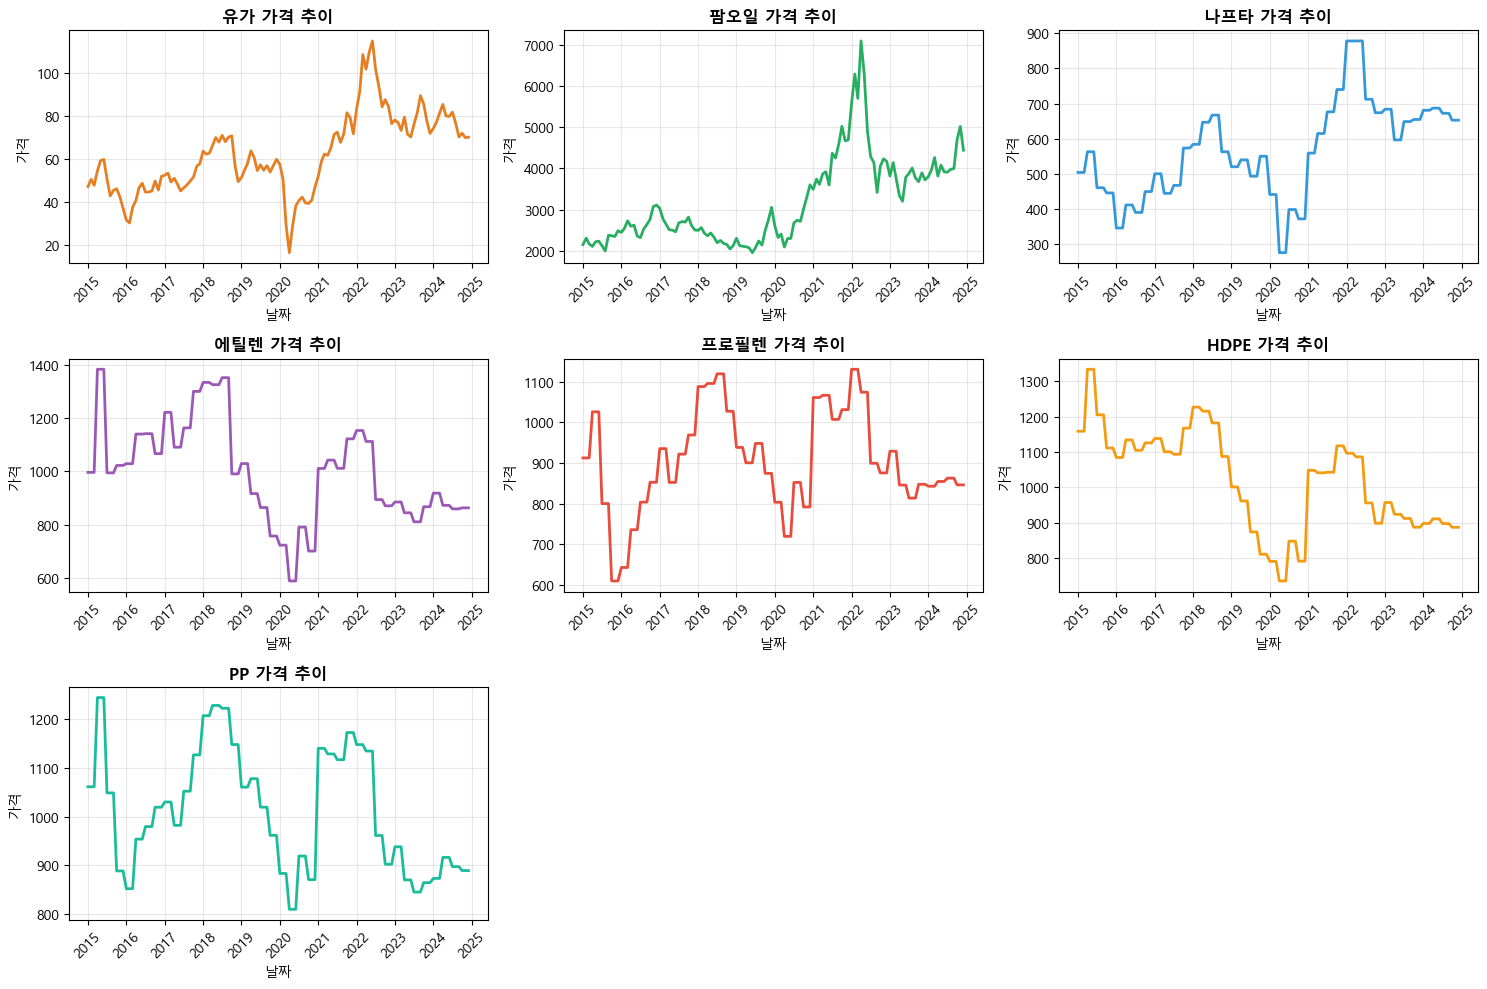

In [44]:
plt.figure(figsize=(15, 10))

for i, 품목 in enumerate(품목_리스트):
    품목_data = df_oil_long[df_oil_long['품목명'] == 품목]['가격']
    
    plt.subplot(3, 3, i+1)
    plt.plot(품목_data.index, 품목_data, color=colors[i % len(colors)], linewidth=2)
    plt.title(f'{품목} 가격 추이', fontsize=12, fontweight='bold')
    plt.xlabel('날짜', fontsize=10)
    plt.ylabel('가격', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


=== 품목별 개별 시계열 분해 시작 (7개 품목) ===

📊 유가 분석 중... (1/7)

📈 유가 기본 통계:
   평균: 62.08
   최솟값: 16.55 (2020-04)
   최댓값: 114.84 (2022-06)
   표준편차: 18.21
   변동계수: 29.3%

🔍 유가 시계열 분해 중...


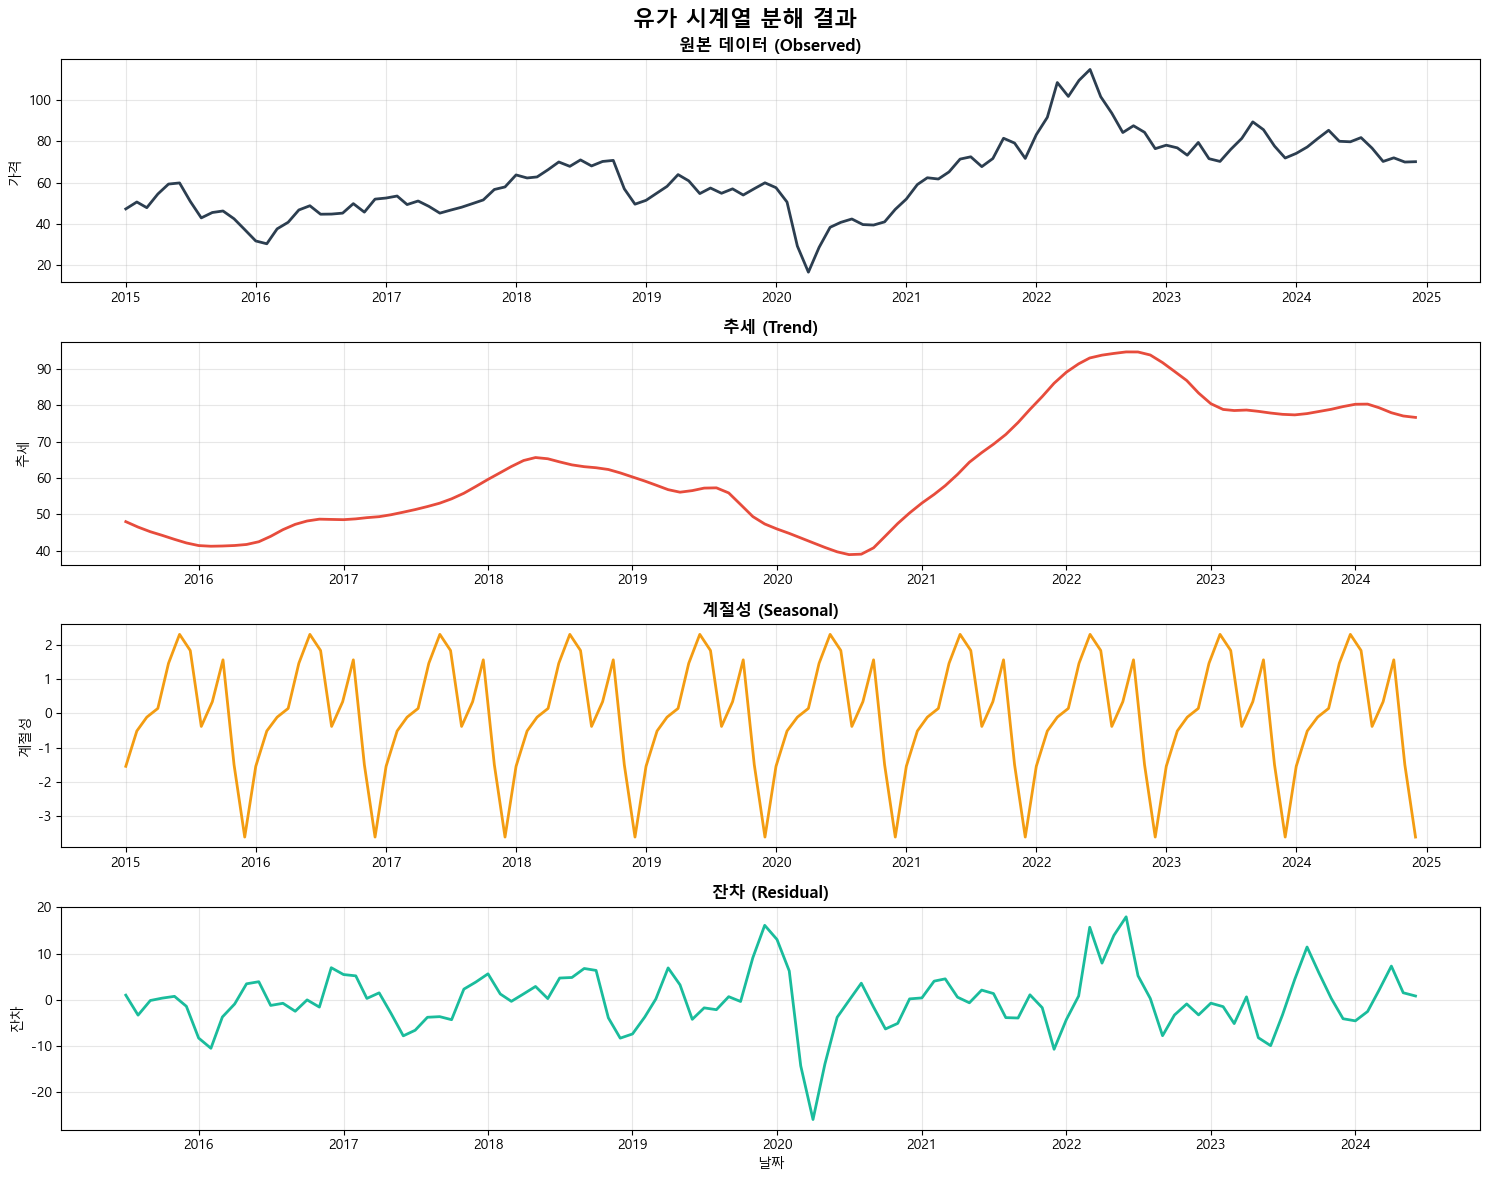

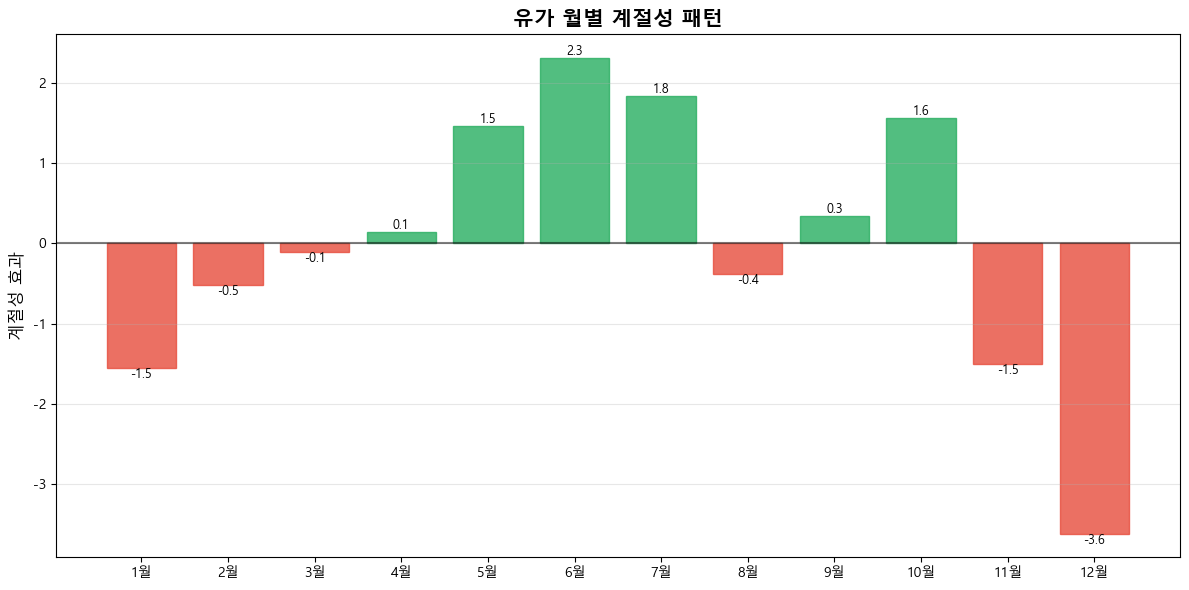


📅 유가 계절성 분석:
   최고점: 6월 (2.31)
   최저점: 12월 (-3.62)
   계절성 변동폭: 5.93

🔬 유가 정상성 검정:
   ADF 통계량: -2.228770
   p-value: 0.195970
   ❌ 유가 비정상성을 가짐 (p > 0.05)

🔄 유가 1차 차분 적용:
   ADF 통계량: -7.821311
   p-value: 0.000000
   ✅ 유가 1차 차분 정상성을 가짐 (p < 0.05)


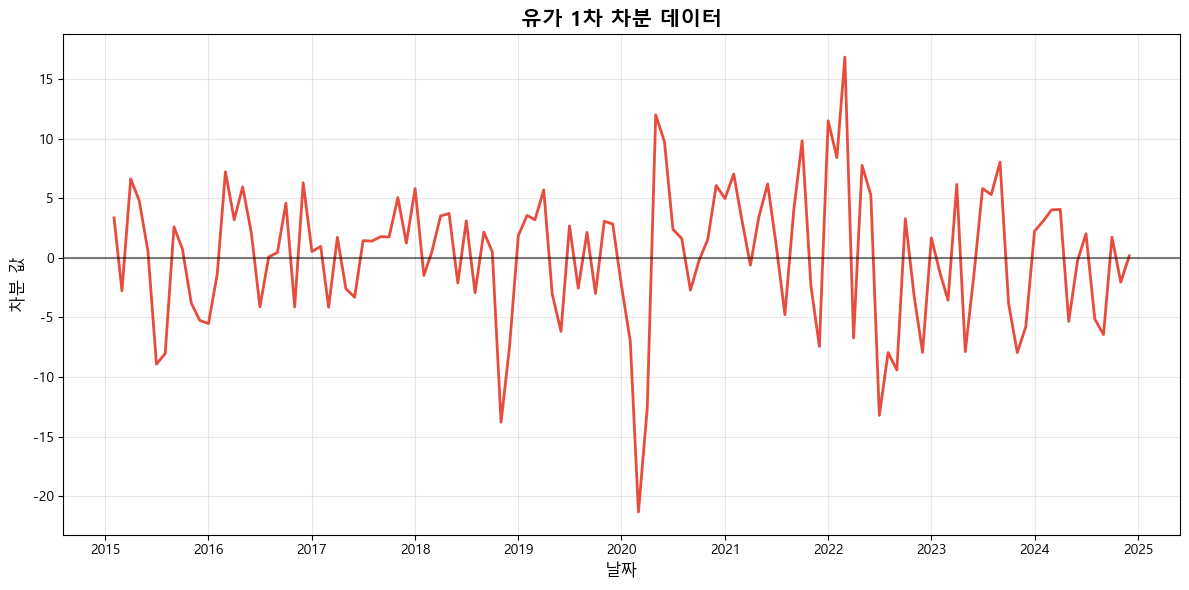


📊 유가 자기상관 분석:


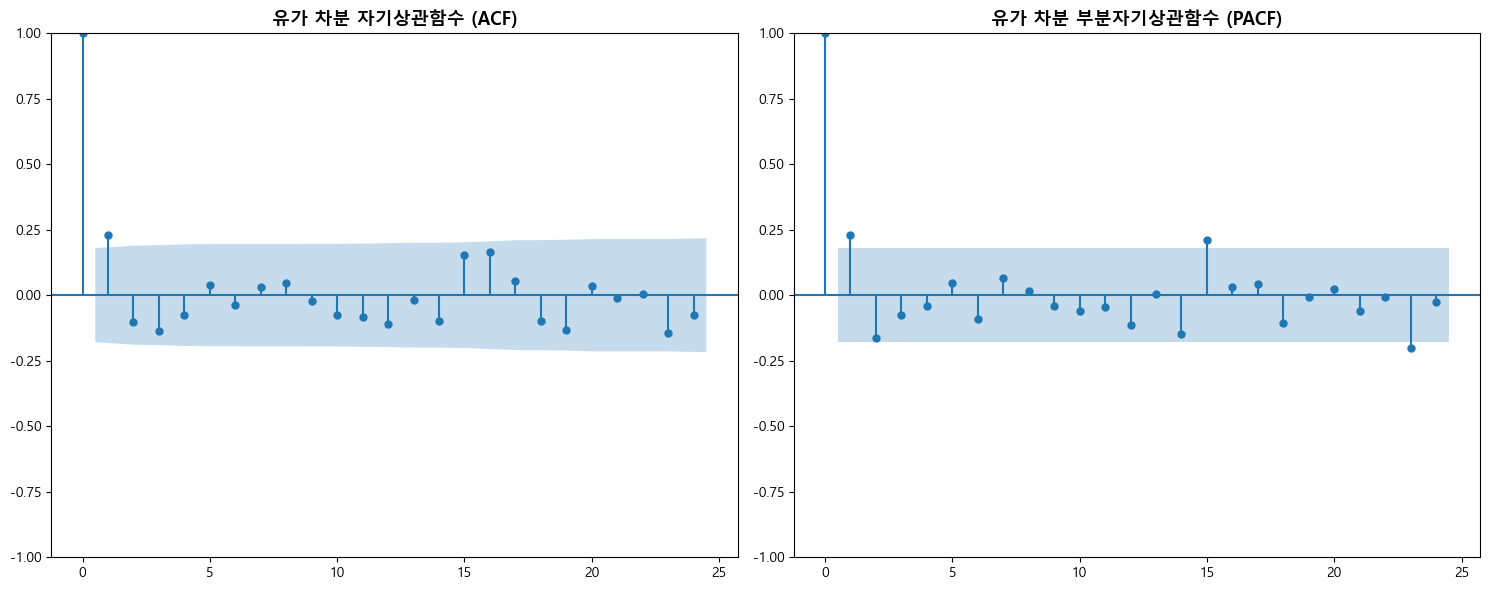

✅ 유가 분석 완료!

📊 팜오일 분석 중... (2/7)

📈 팜오일 기본 통계:
   평균: 3186.13
   최솟값: 1951.00 (2019-06)
   최댓값: 7104.00 (2022-04)
   표준편차: 1051.91
   변동계수: 33.0%

🔍 팜오일 시계열 분해 중...


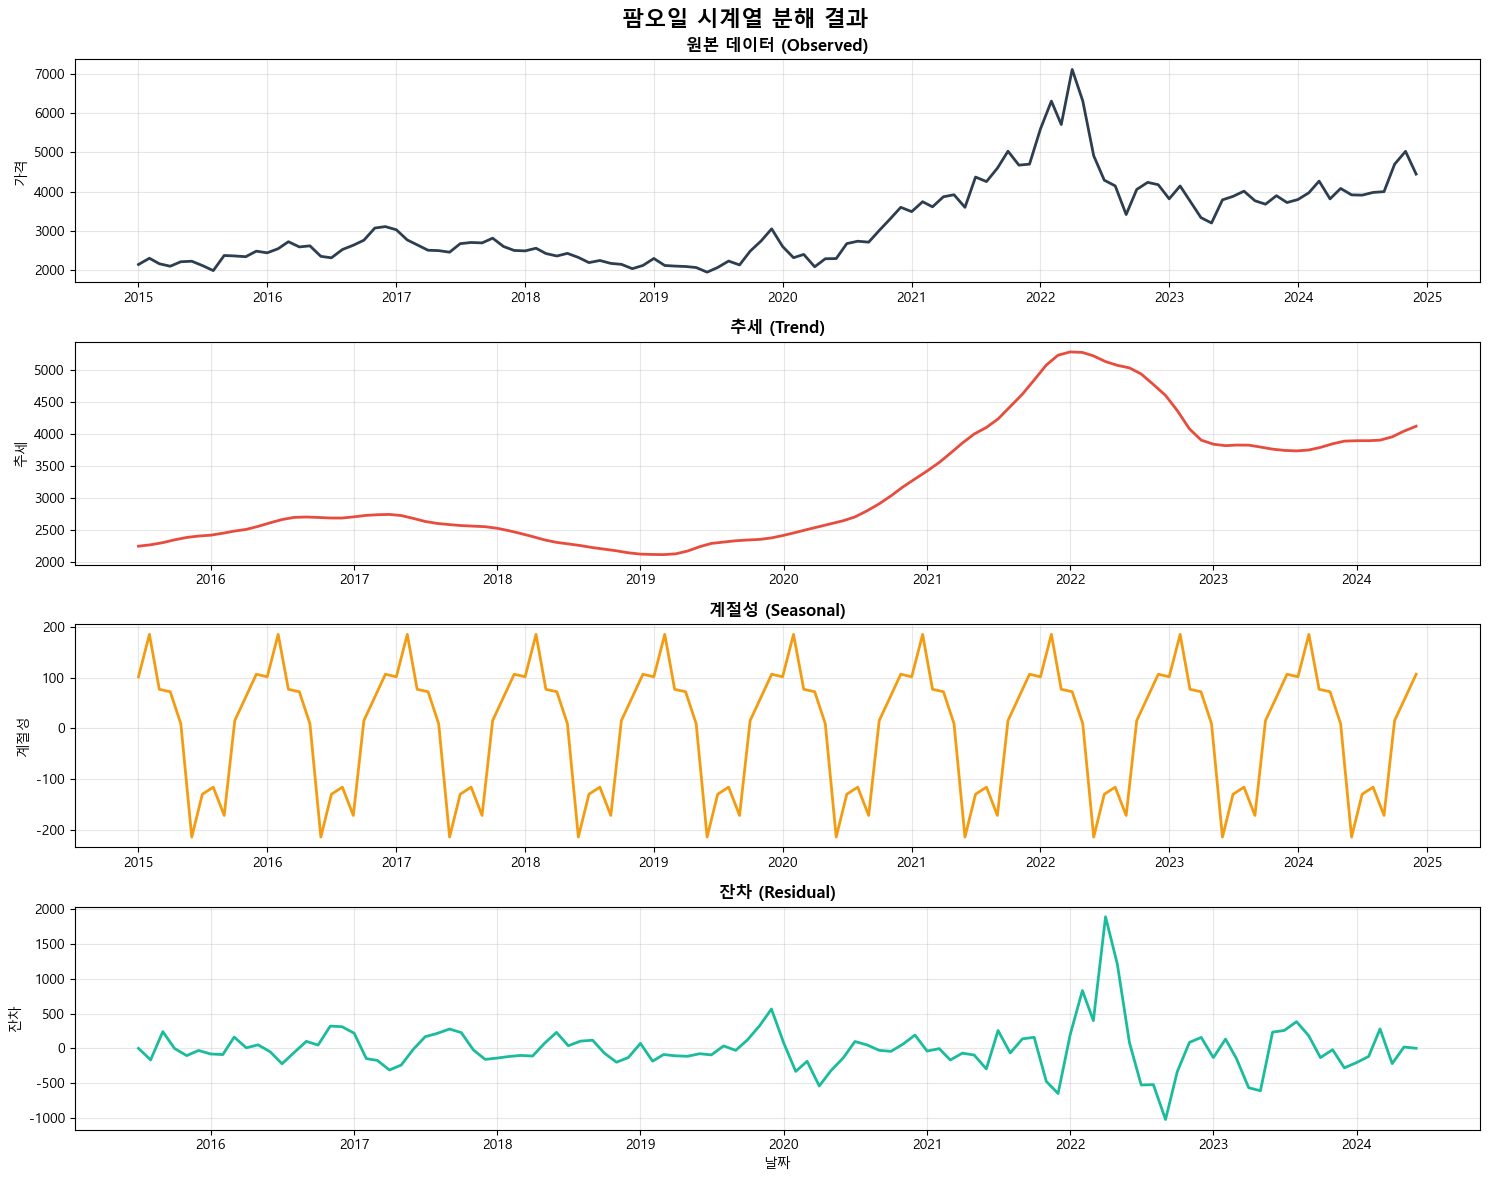

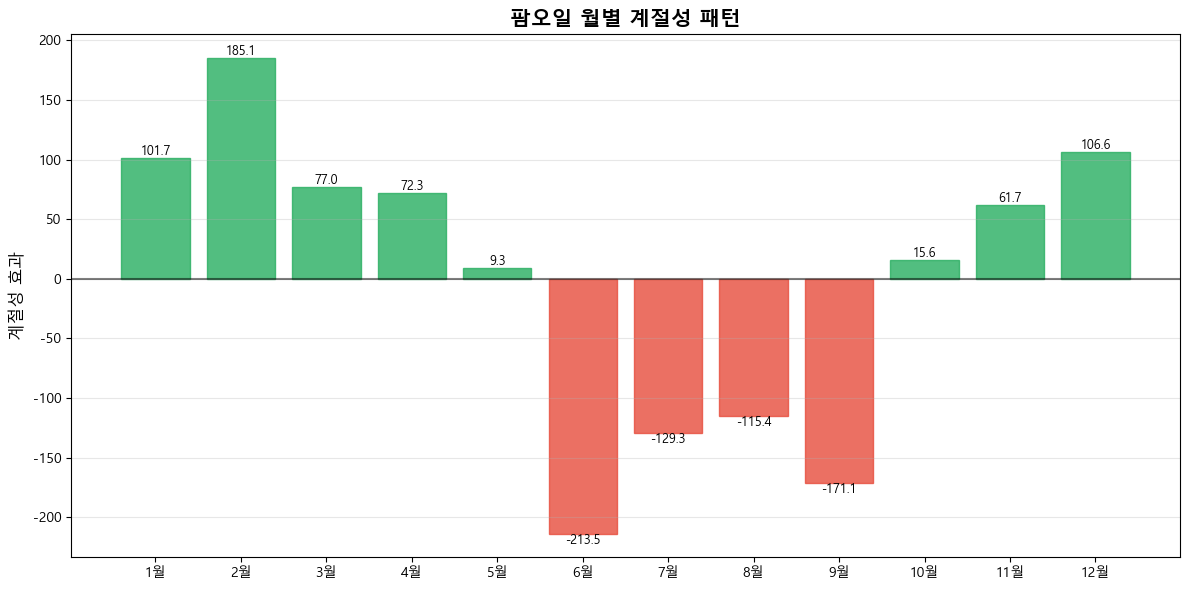


📅 팜오일 계절성 분석:
   최고점: 2월 (185.06)
   최저점: 6월 (-213.52)
   계절성 변동폭: 398.58

🔬 팜오일 정상성 검정:
   ADF 통계량: -1.117849
   p-value: 0.707902
   ❌ 팜오일 비정상성을 가짐 (p > 0.05)

🔄 팜오일 1차 차분 적용:
   ADF 통계량: -6.820879
   p-value: 0.000000
   ✅ 팜오일 1차 차분 정상성을 가짐 (p < 0.05)


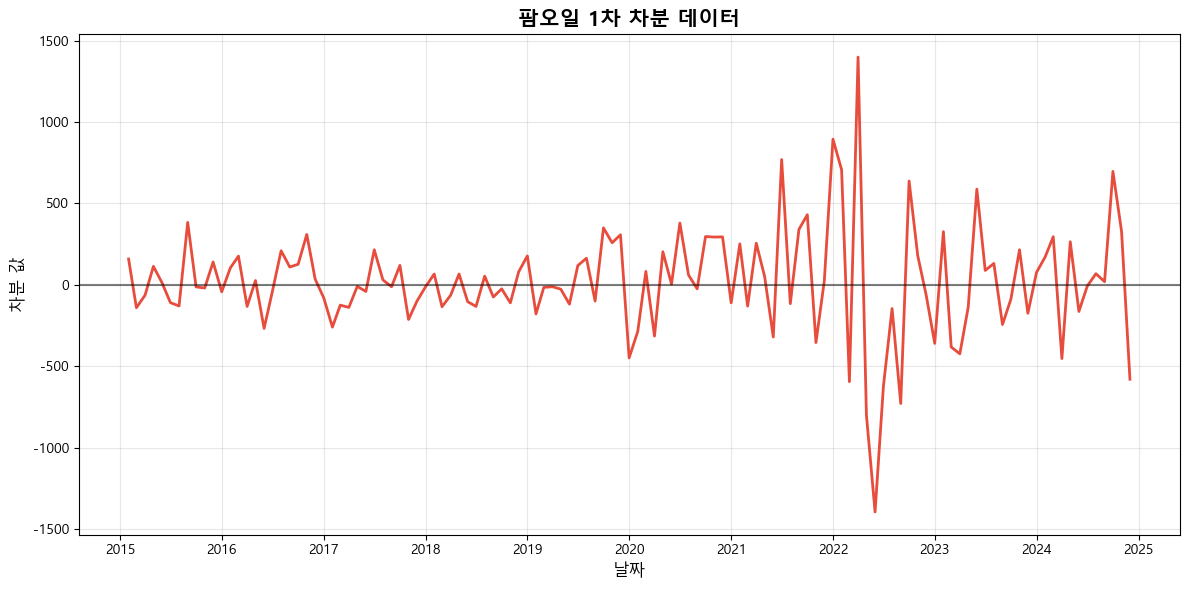


📊 팜오일 자기상관 분석:


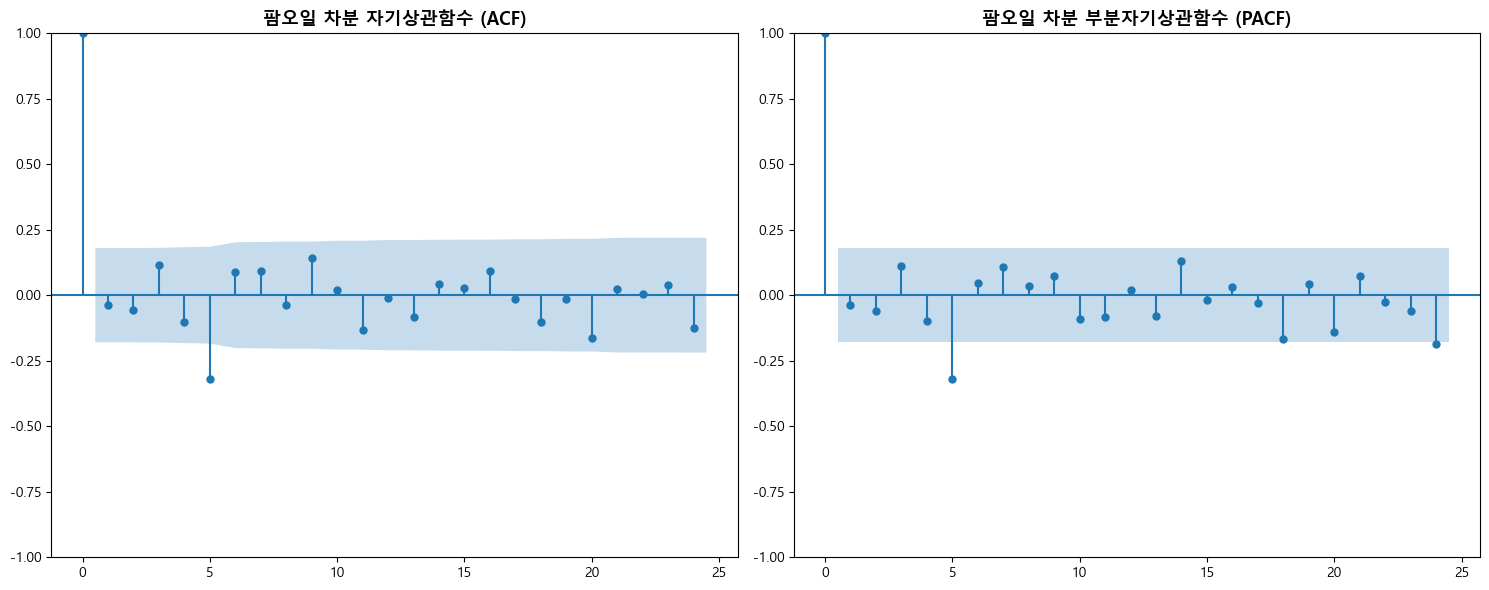

✅ 팜오일 분석 완료!

📊 나프타 분석 중... (3/7)

📈 나프타 기본 통계:
   평균: 565.91
   최솟값: 276.81 (2020-04)
   최댓값: 878.21 (2022-04)
   표준편차: 134.04
   변동계수: 23.7%

🔍 나프타 시계열 분해 중...


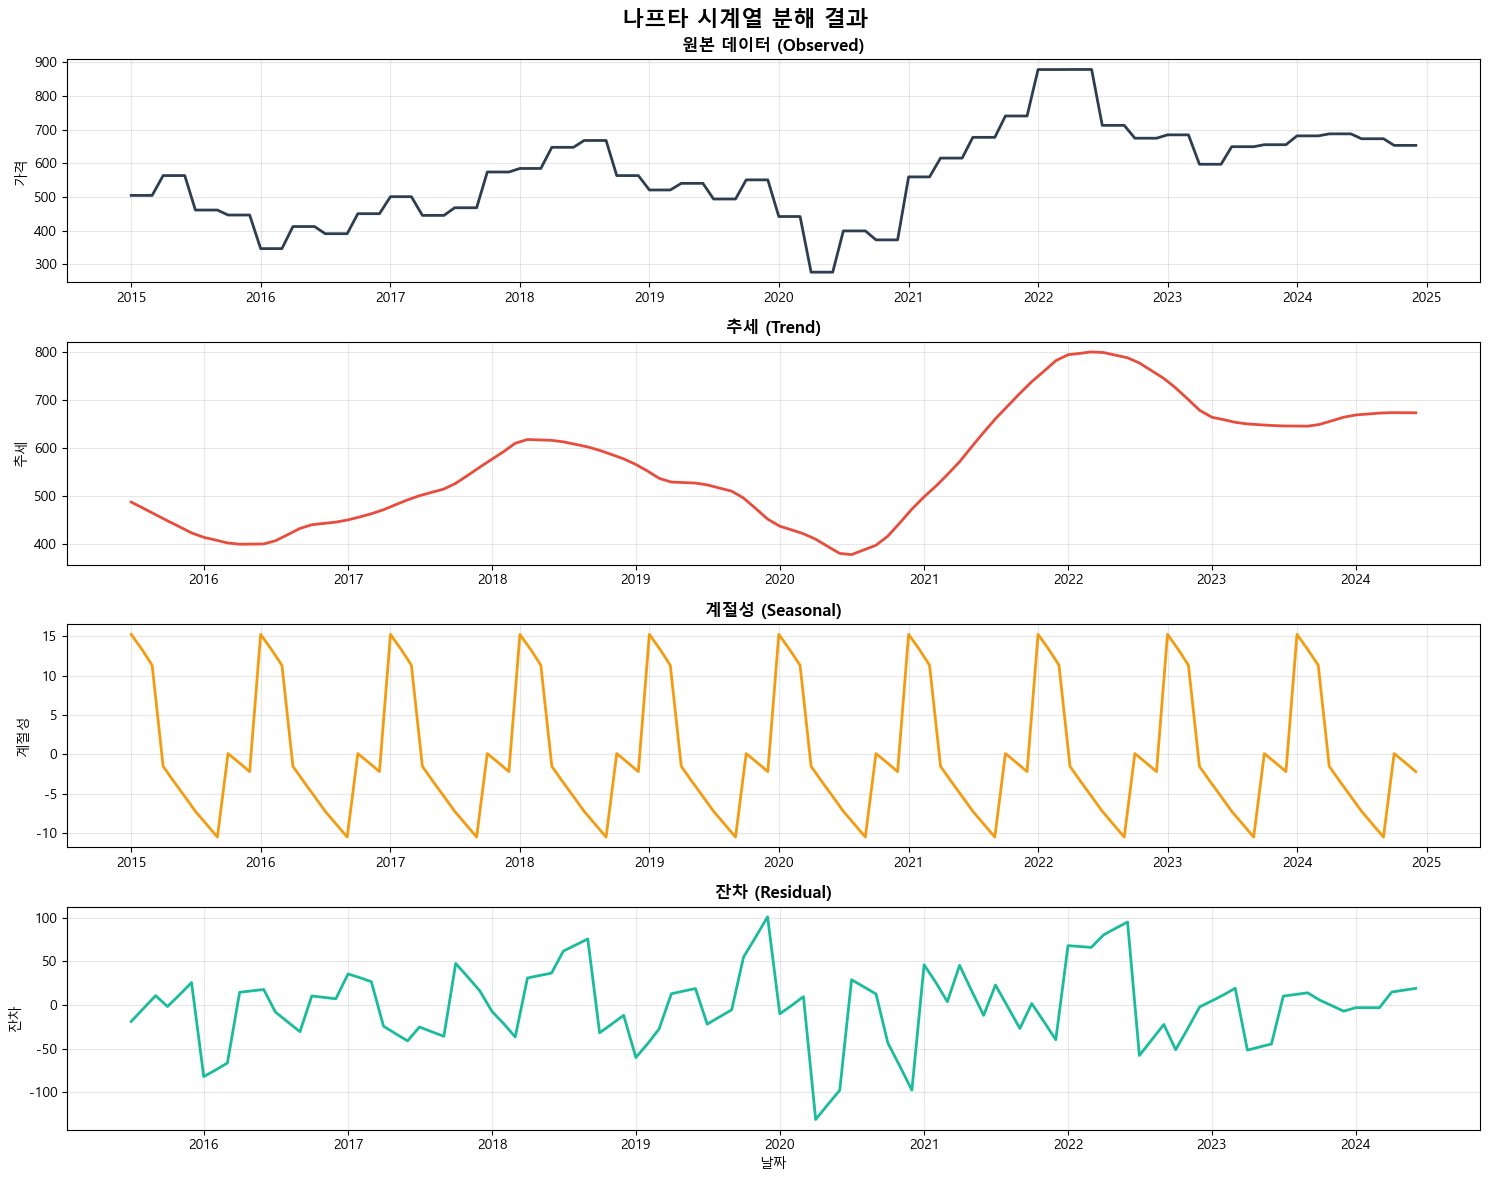

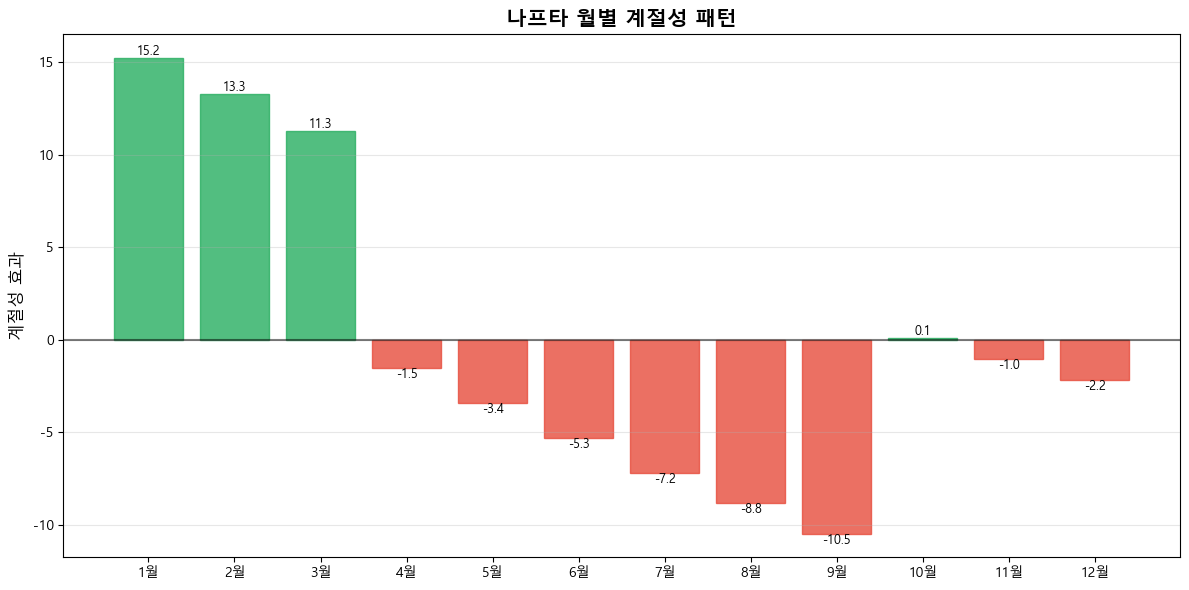


📅 나프타 계절성 분석:
   최고점: 1월 (15.24)
   최저점: 9월 (-10.47)
   계절성 변동폭: 25.71

🔬 나프타 정상성 검정:
   ADF 통계량: -1.781592
   p-value: 0.389638
   ❌ 나프타 비정상성을 가짐 (p > 0.05)

🔄 나프타 1차 차분 적용:
   ADF 통계량: -10.778972
   p-value: 0.000000
   ✅ 나프타 1차 차분 정상성을 가짐 (p < 0.05)


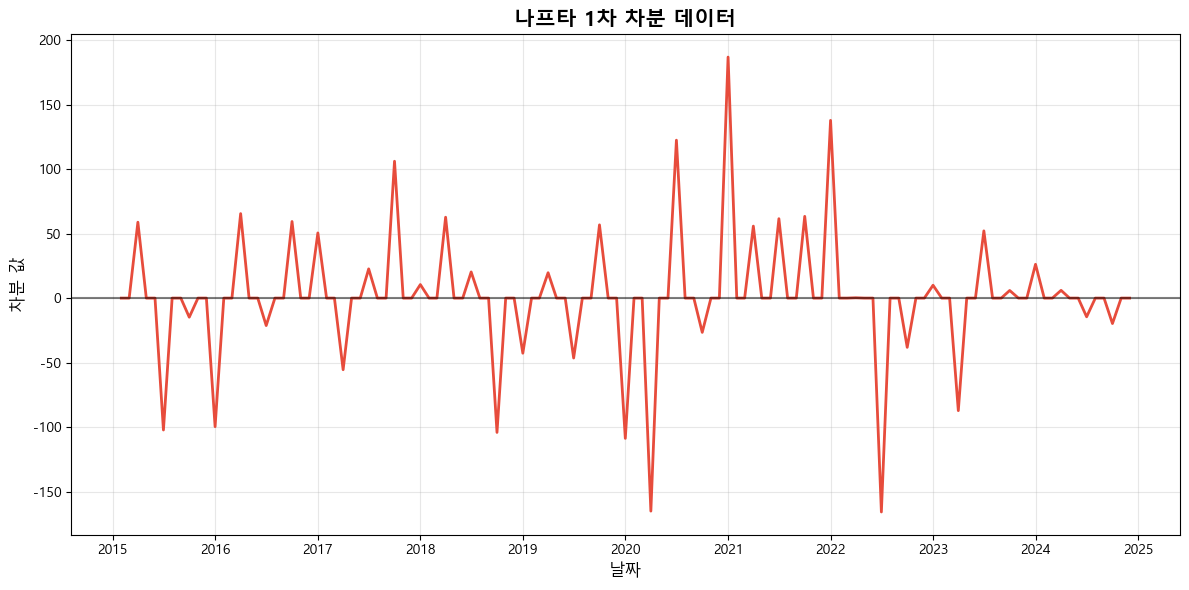


📊 나프타 자기상관 분석:


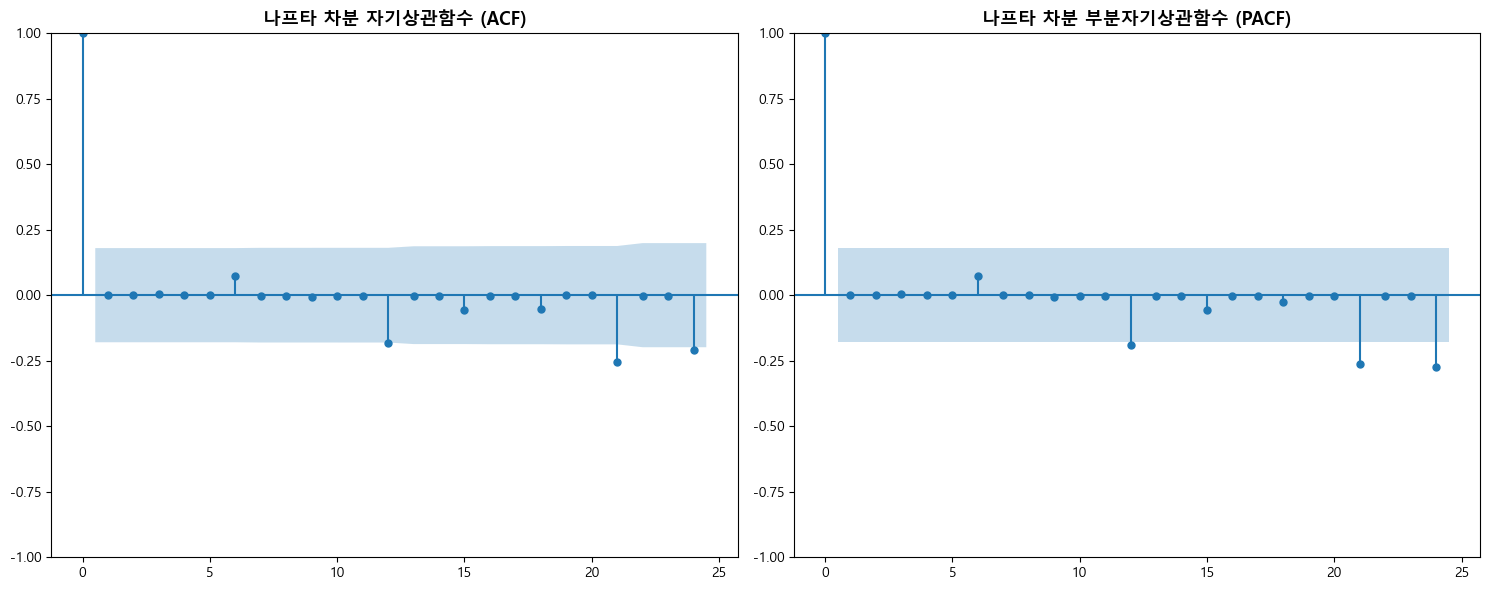

✅ 나프타 분석 완료!

📊 에틸렌 분석 중... (4/7)

📈 에틸렌 기본 통계:
   평균: 1001.46
   최솟값: 588.58 (2020-04)
   최댓값: 1383.33 (2015-04)
   표준편차: 188.24
   변동계수: 18.8%

🔍 에틸렌 시계열 분해 중...


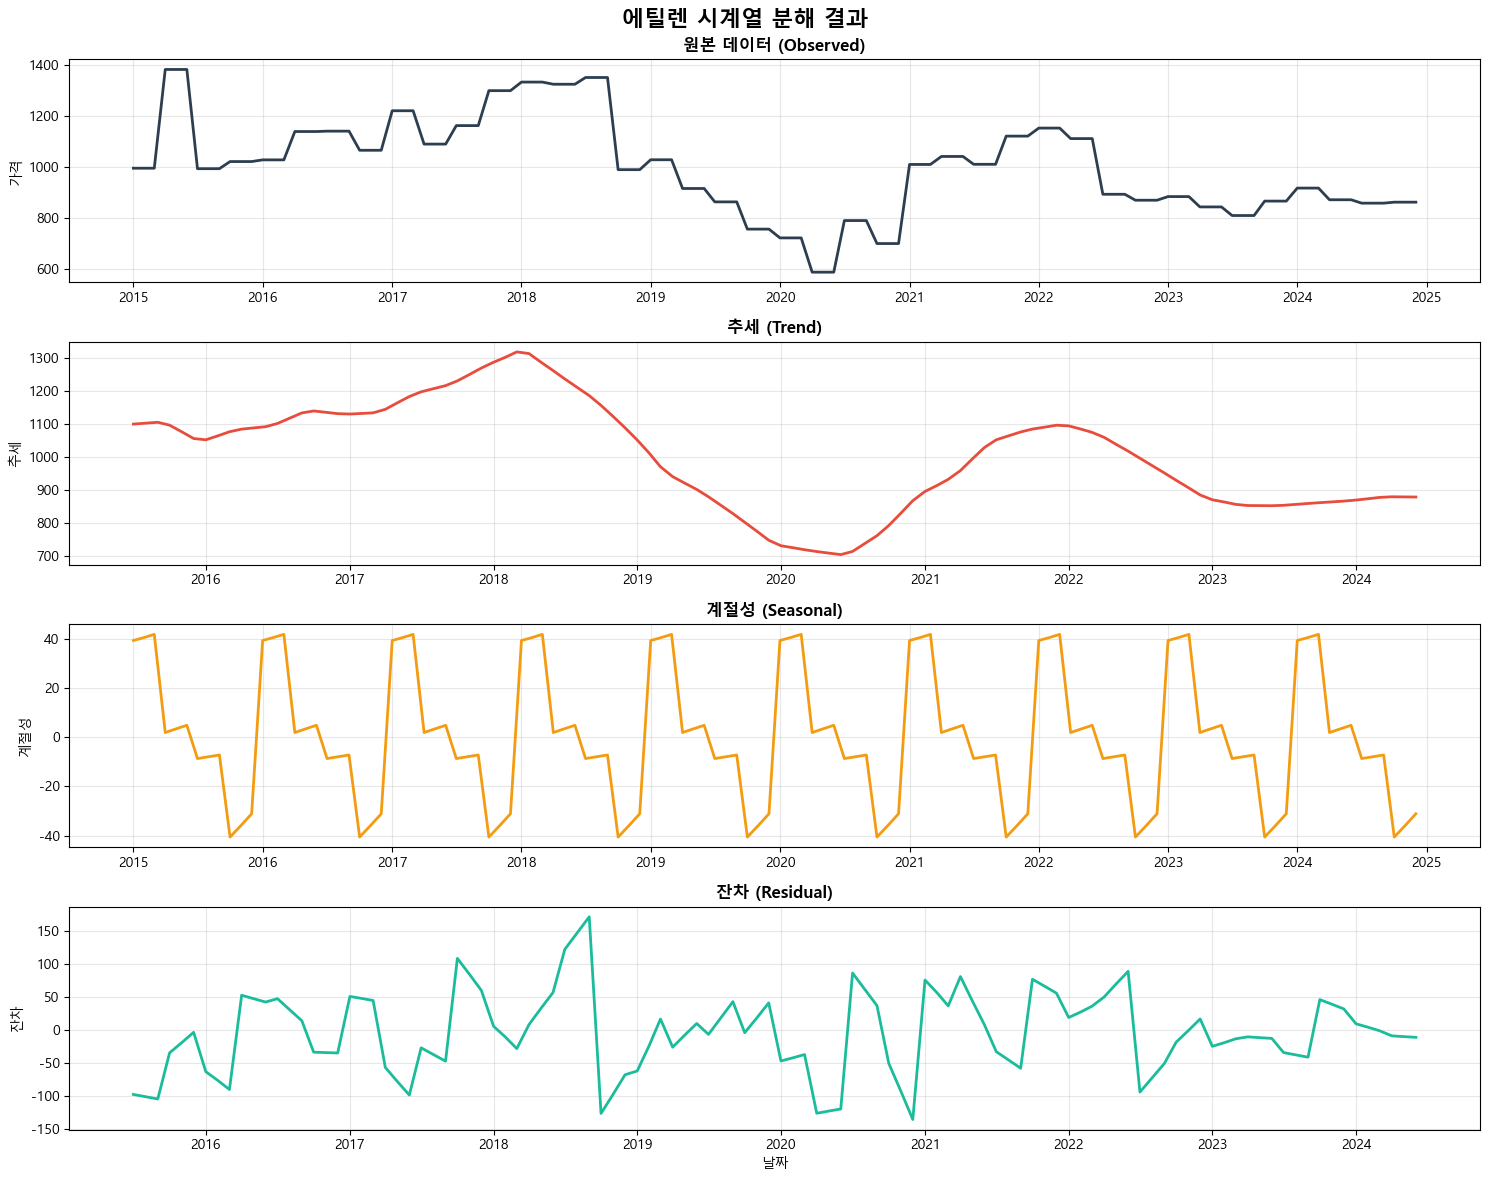

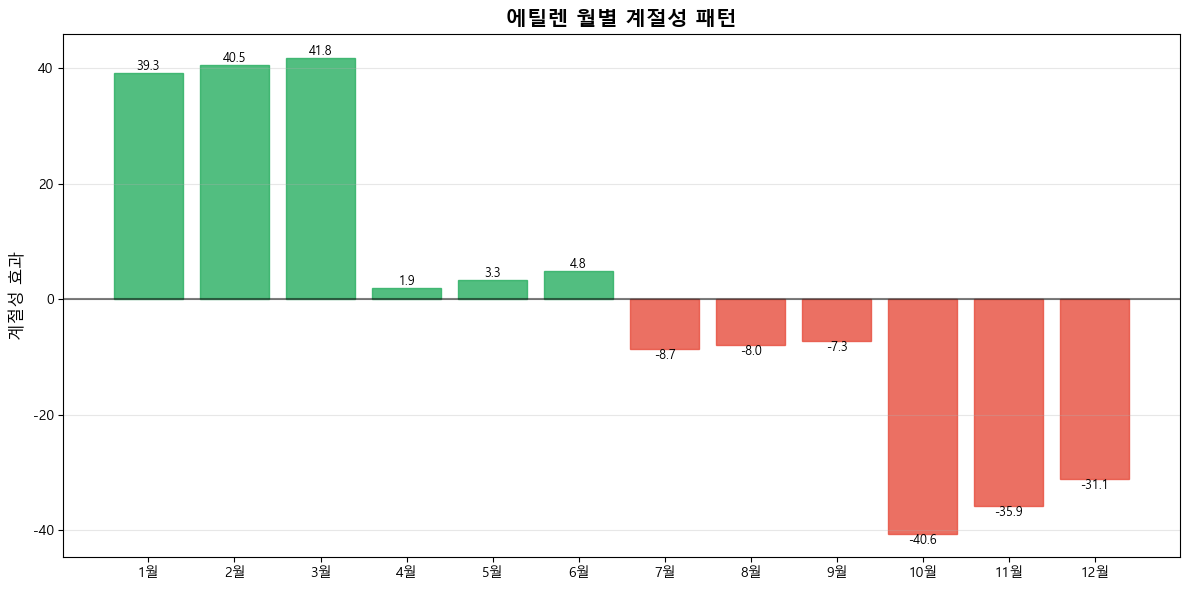


📅 에틸렌 계절성 분석:
   최고점: 3월 (41.76)
   최저점: 10월 (-40.60)
   계절성 변동폭: 82.36

🔬 에틸렌 정상성 검정:
   ADF 통계량: -2.336203
   p-value: 0.160557
   ❌ 에틸렌 비정상성을 가짐 (p > 0.05)

🔄 에틸렌 1차 차분 적용:
   ADF 통계량: -10.772386
   p-value: 0.000000
   ✅ 에틸렌 1차 차분 정상성을 가짐 (p < 0.05)


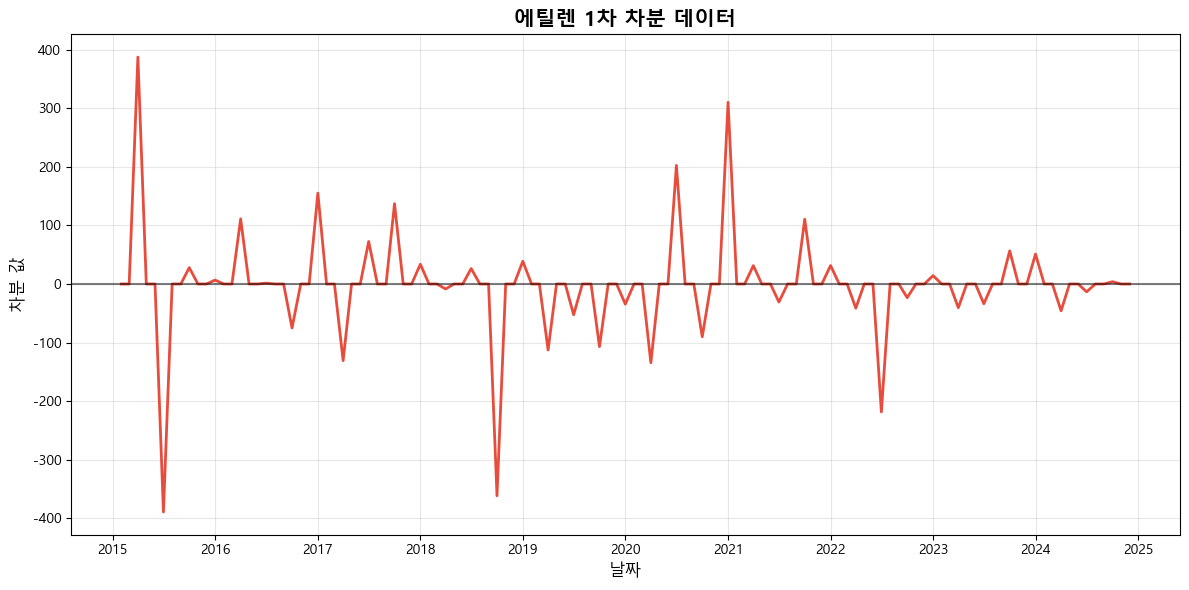


📊 에틸렌 자기상관 분석:


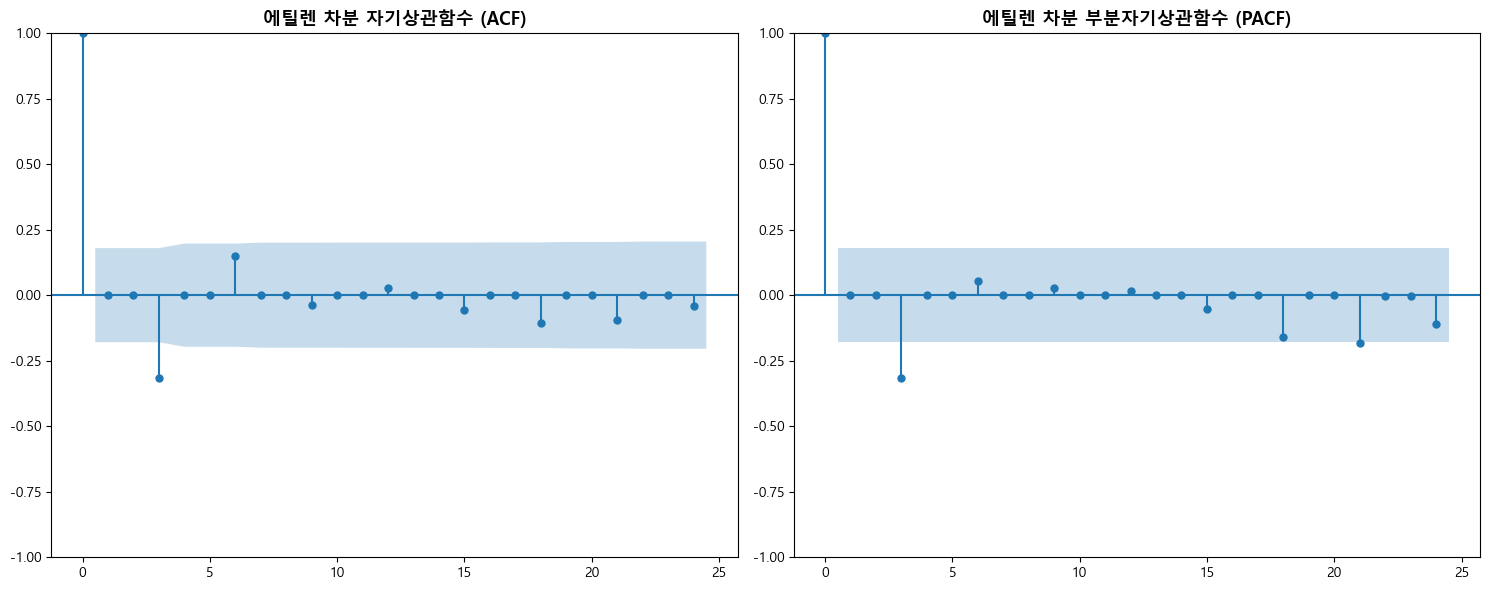

✅ 에틸렌 분석 완료!

📊 프로필렌 분석 중... (5/7)

📈 프로필렌 기본 통계:
   평균: 905.11
   최솟값: 609.05 (2015-10)
   최댓값: 1131.00 (2022-01)
   표준편차: 124.36
   변동계수: 13.7%

🔍 프로필렌 시계열 분해 중...


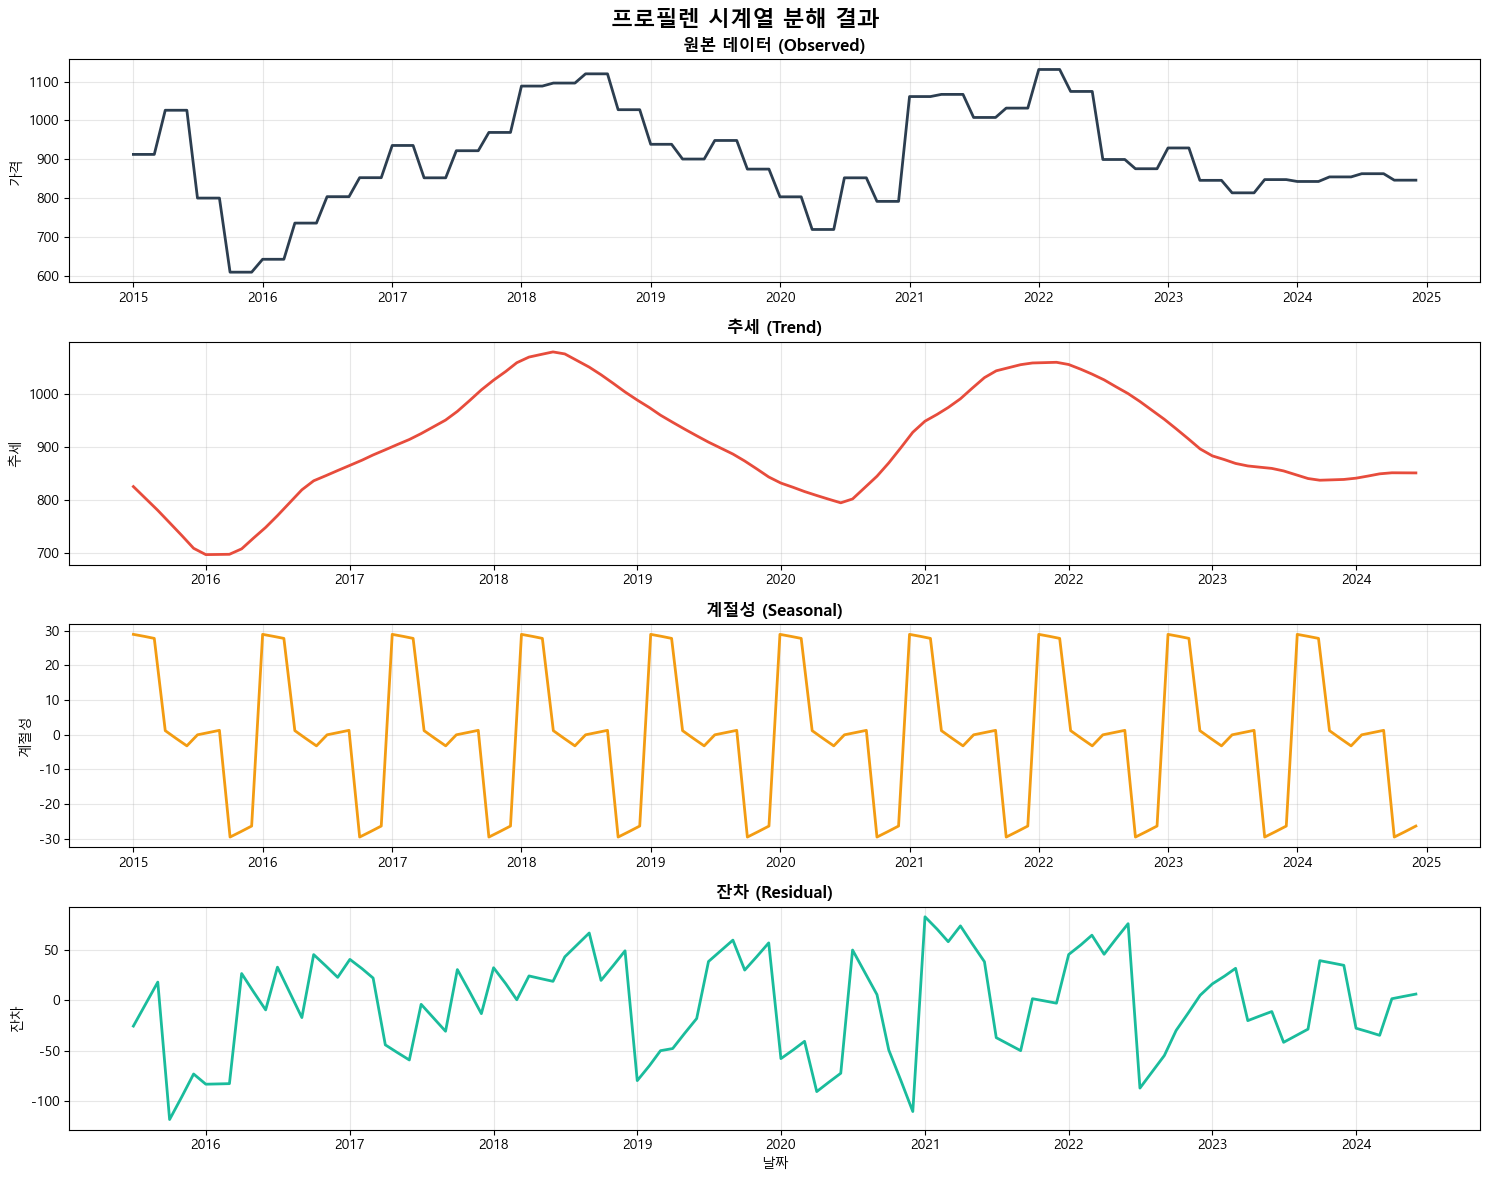

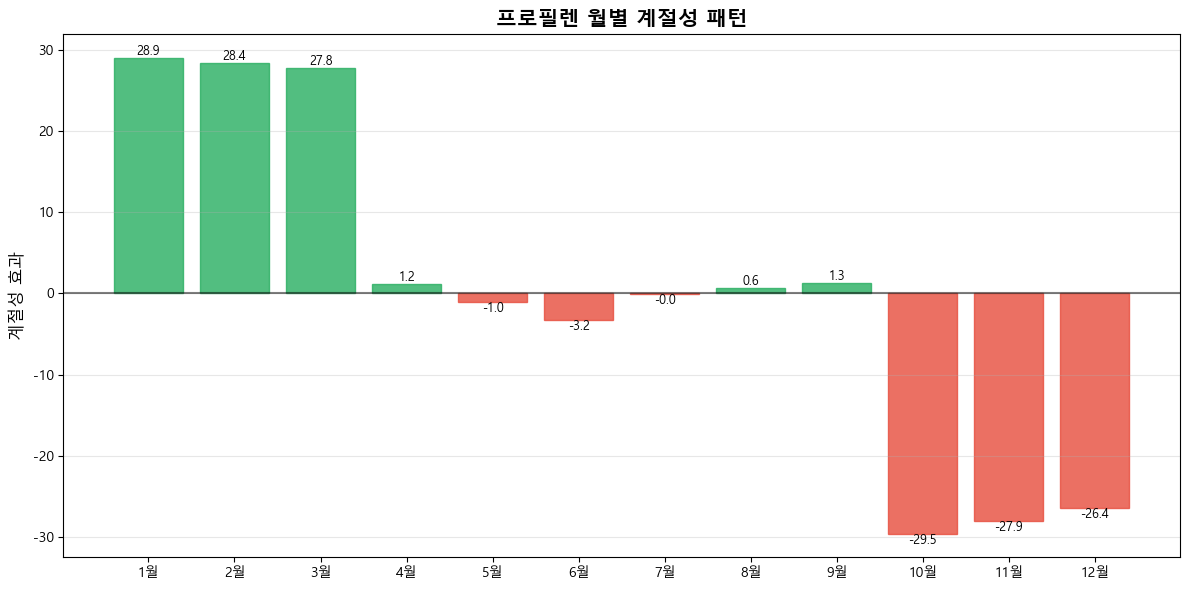


📅 프로필렌 계절성 분석:
   최고점: 1월 (28.95)
   최저점: 10월 (-29.53)
   계절성 변동폭: 58.48

🔬 프로필렌 정상성 검정:
   ADF 통계량: -2.379418
   p-value: 0.147630
   ❌ 프로필렌 비정상성을 가짐 (p > 0.05)

🔄 프로필렌 1차 차분 적용:
   ADF 통계량: -10.771491
   p-value: 0.000000
   ✅ 프로필렌 1차 차분 정상성을 가짐 (p < 0.05)


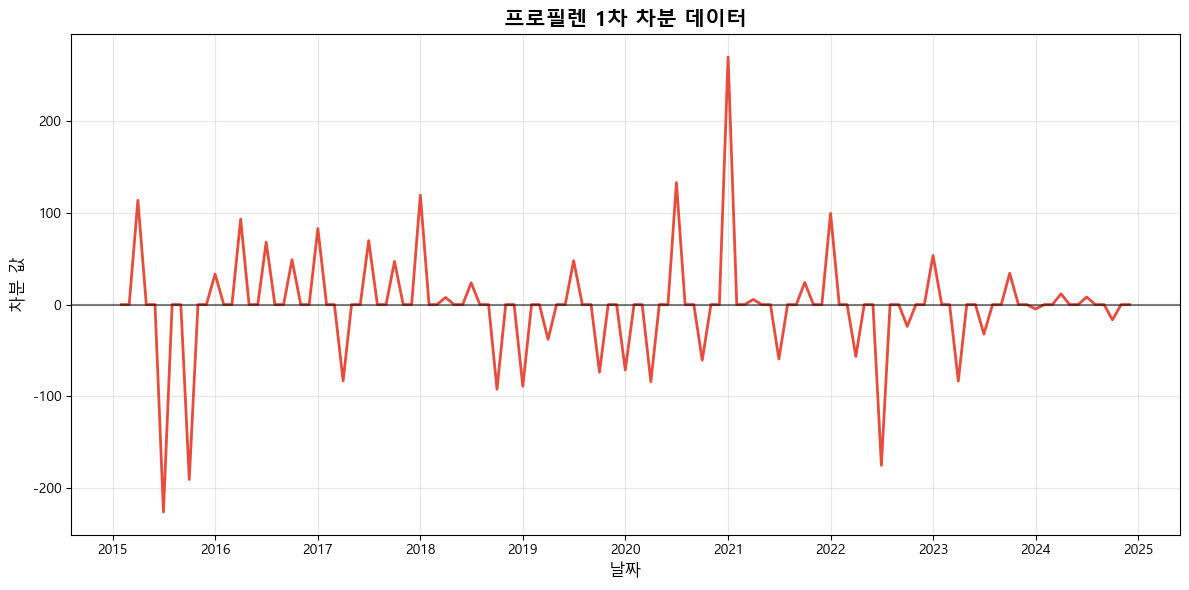


📊 프로필렌 자기상관 분석:


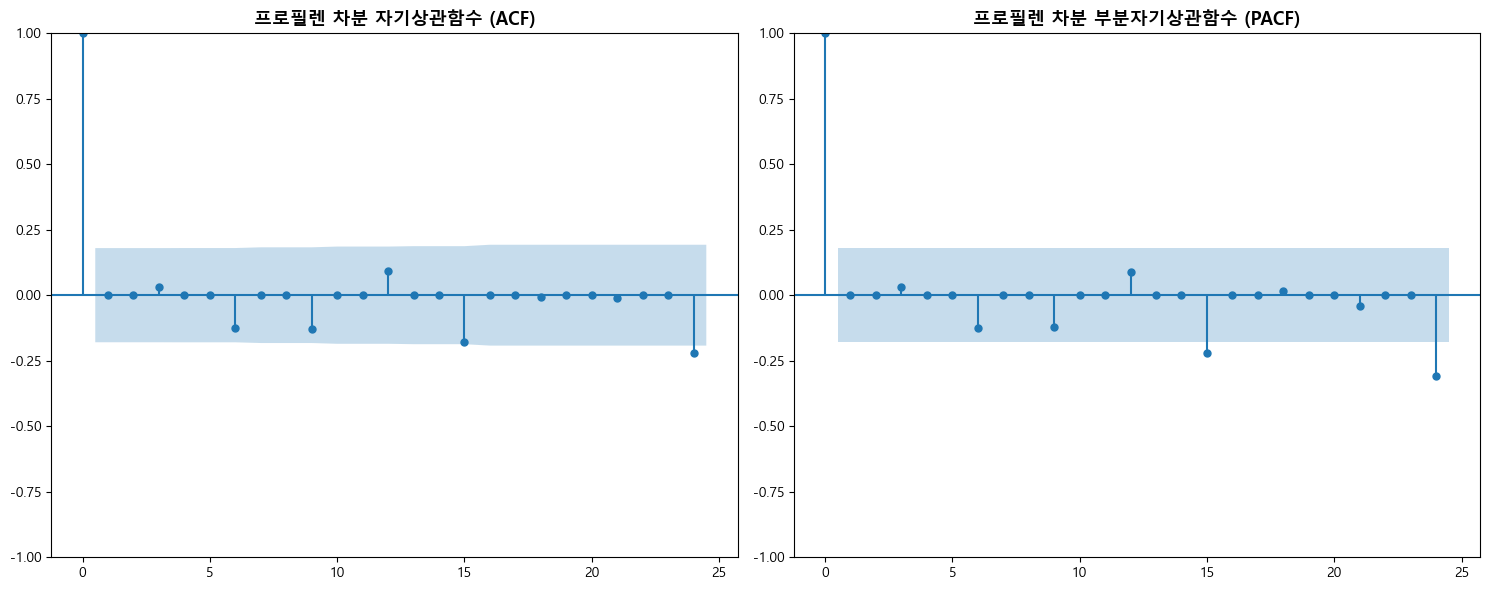

✅ 프로필렌 분석 완료!

📊 HDPE 분석 중... (6/7)

📈 HDPE 기본 통계:
   평균: 1021.27
   최솟값: 735.17 (2020-04)
   최댓값: 1334.50 (2015-04)
   표준편차: 140.58
   변동계수: 13.8%

🔍 HDPE 시계열 분해 중...


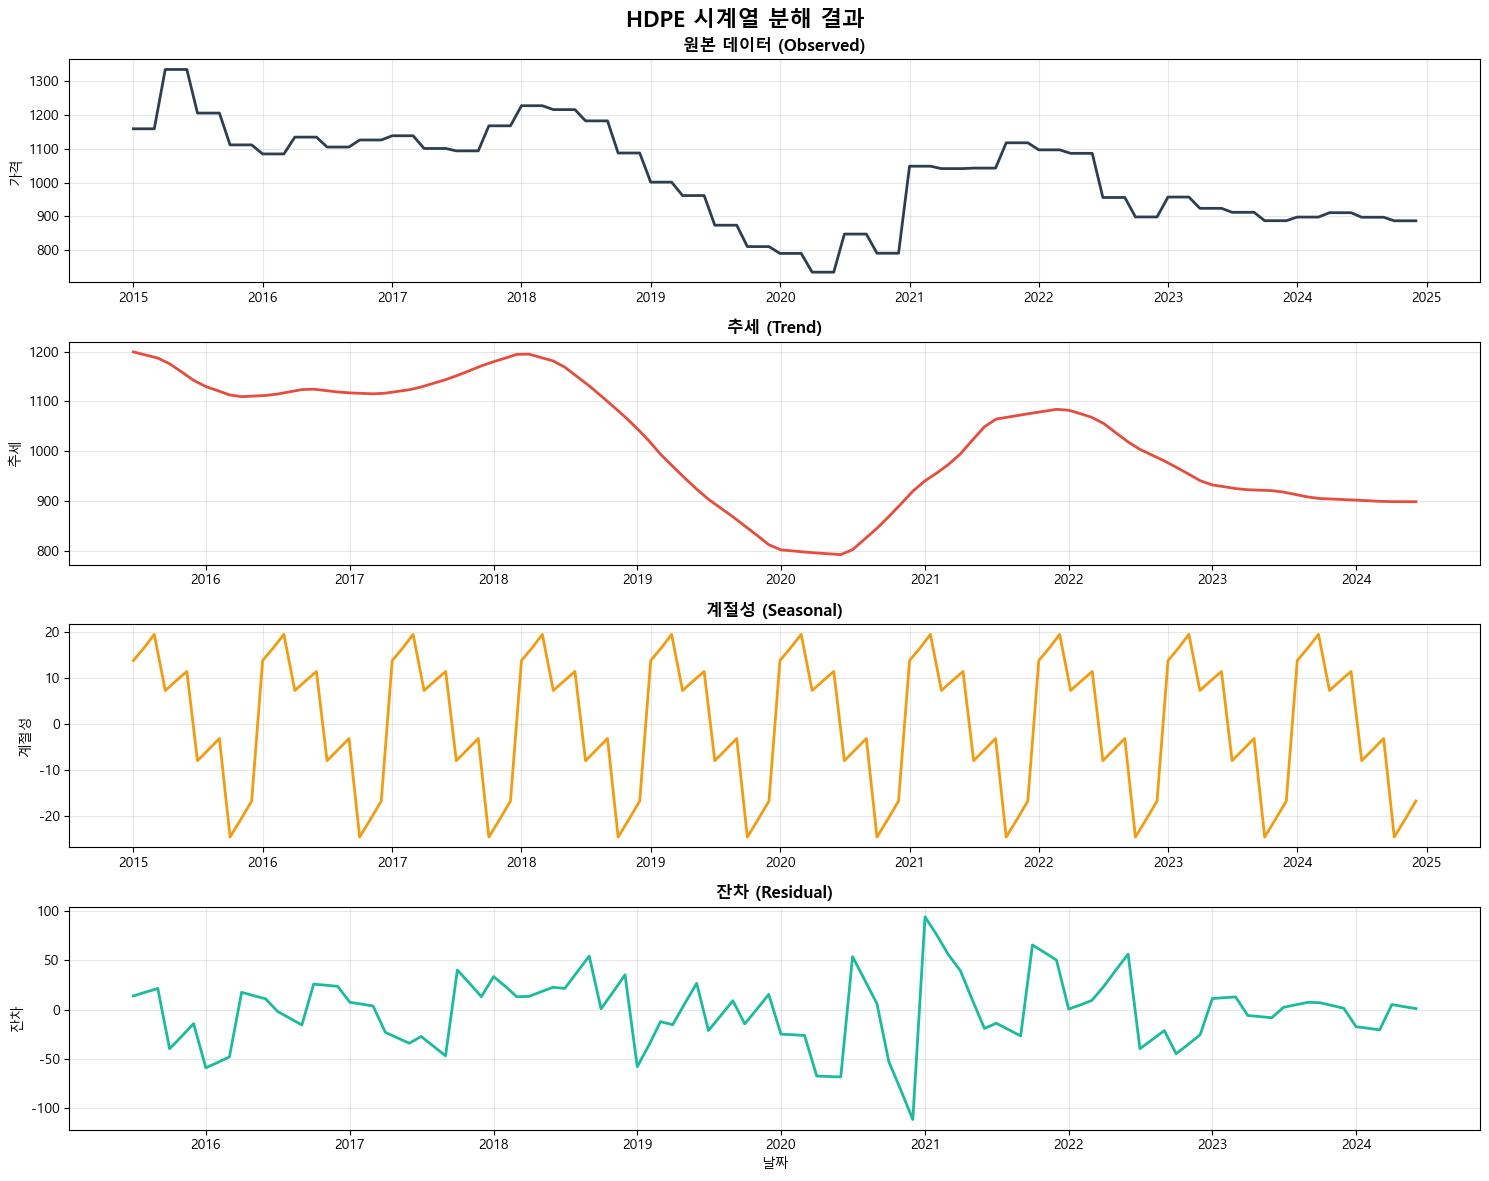

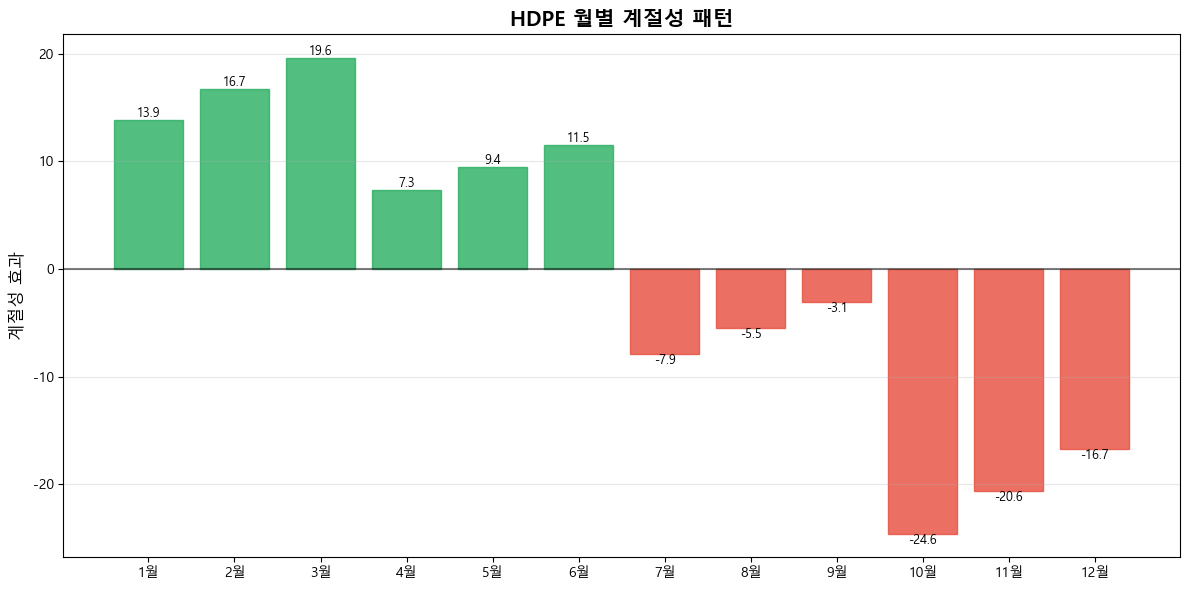


📅 HDPE 계절성 분석:
   최고점: 3월 (19.58)
   최저점: 10월 (-24.56)
   계절성 변동폭: 44.13

🔬 HDPE 정상성 검정:
   ADF 통계량: -1.687087
   p-value: 0.437778
   ❌ HDPE 비정상성을 가짐 (p > 0.05)

🔄 HDPE 1차 차분 적용:
   ADF 통계량: -10.801115
   p-value: 0.000000
   ✅ HDPE 1차 차분 정상성을 가짐 (p < 0.05)


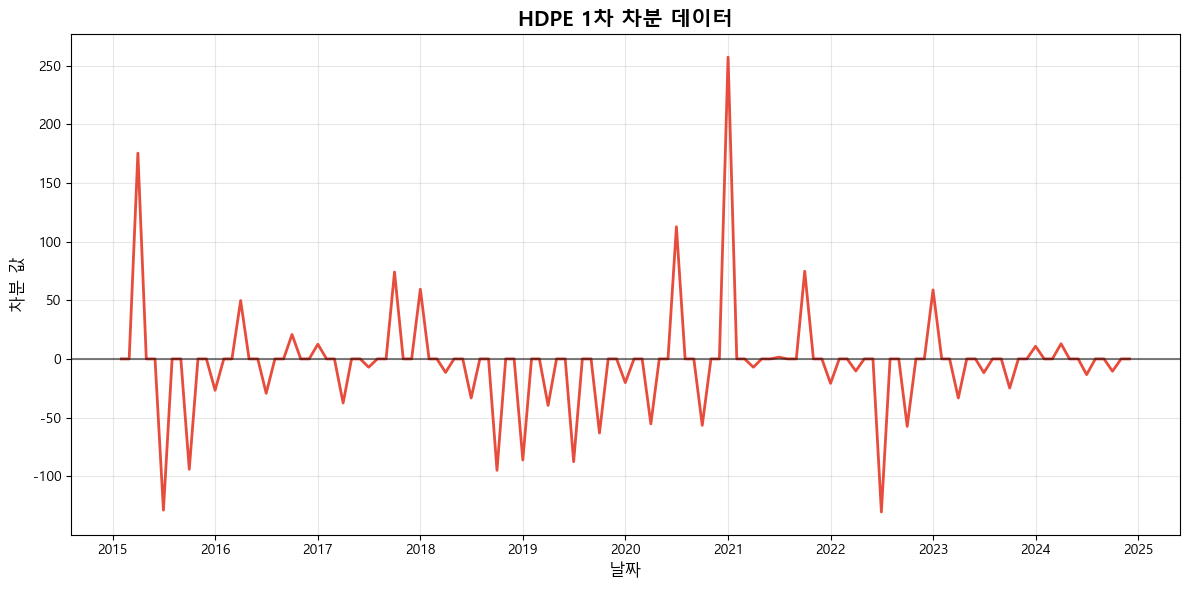


📊 HDPE 자기상관 분석:


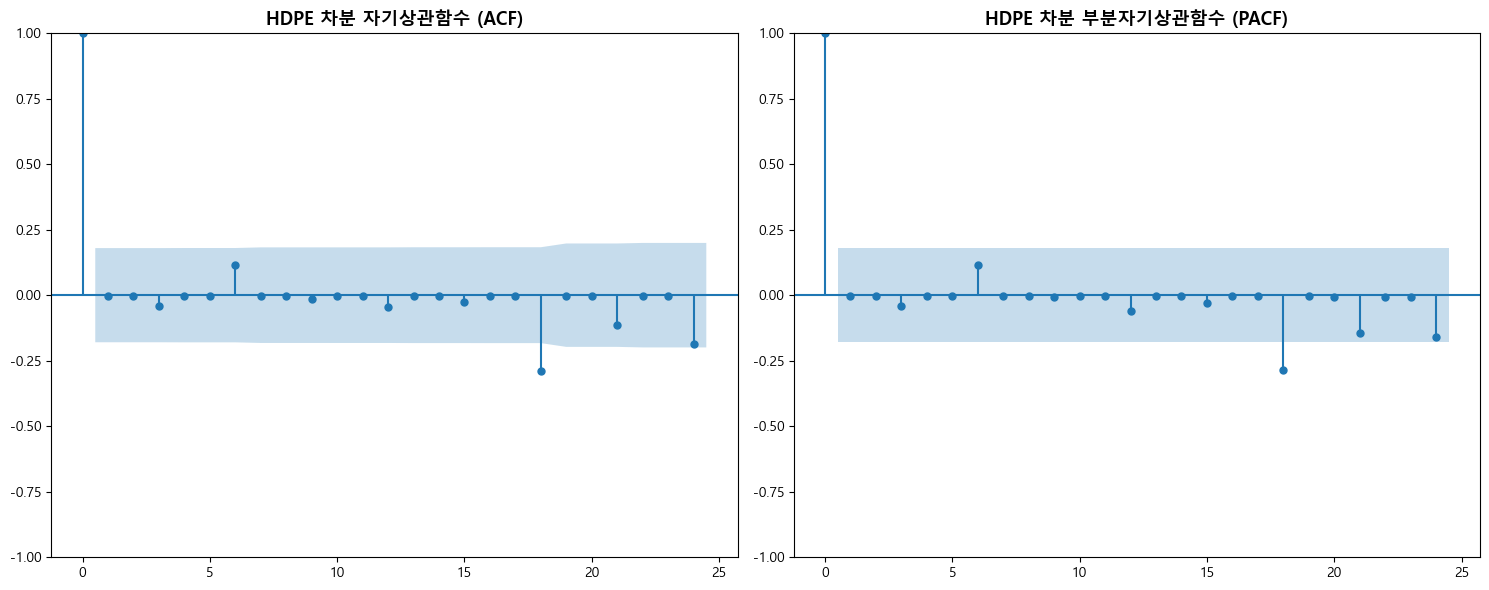

✅ HDPE 분석 완료!

📊 PP 분석 중... (7/7)

📈 PP 기본 통계:
   평균: 1010.94
   최솟값: 809.58 (2020-04)
   최댓값: 1244.17 (2015-04)
   표준편차: 123.89
   변동계수: 12.3%

🔍 PP 시계열 분해 중...


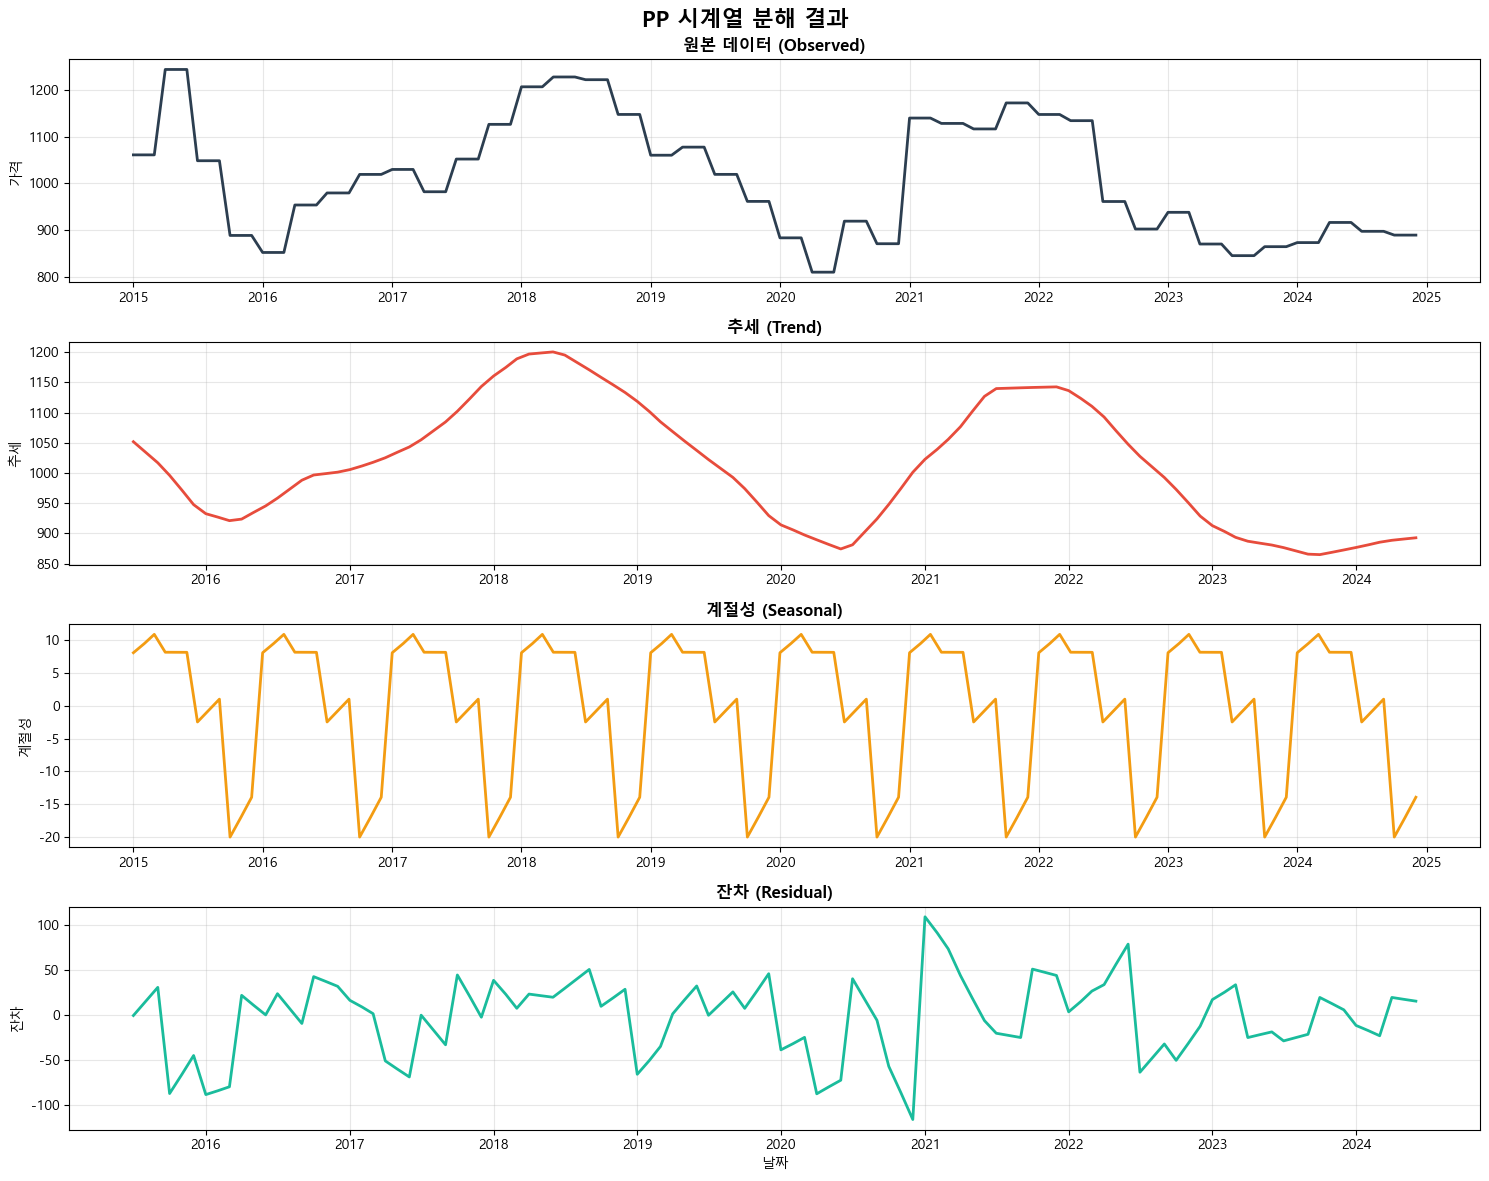

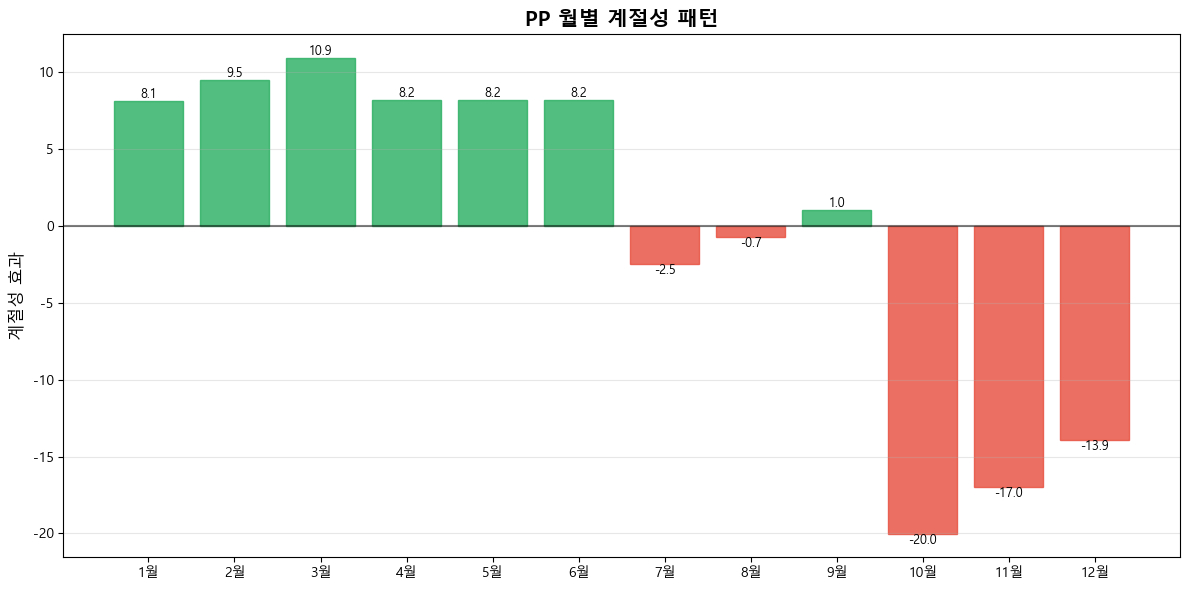


📅 PP 계절성 분석:
   최고점: 3월 (10.91)
   최저점: 10월 (-20.01)
   계절성 변동폭: 30.91

🔬 PP 정상성 검정:
   ADF 통계량: -2.137201
   p-value: 0.229821
   ❌ PP 비정상성을 가짐 (p > 0.05)

🔄 PP 1차 차분 적용:
   ADF 통계량: -10.779436
   p-value: 0.000000
   ✅ PP 1차 차분 정상성을 가짐 (p < 0.05)


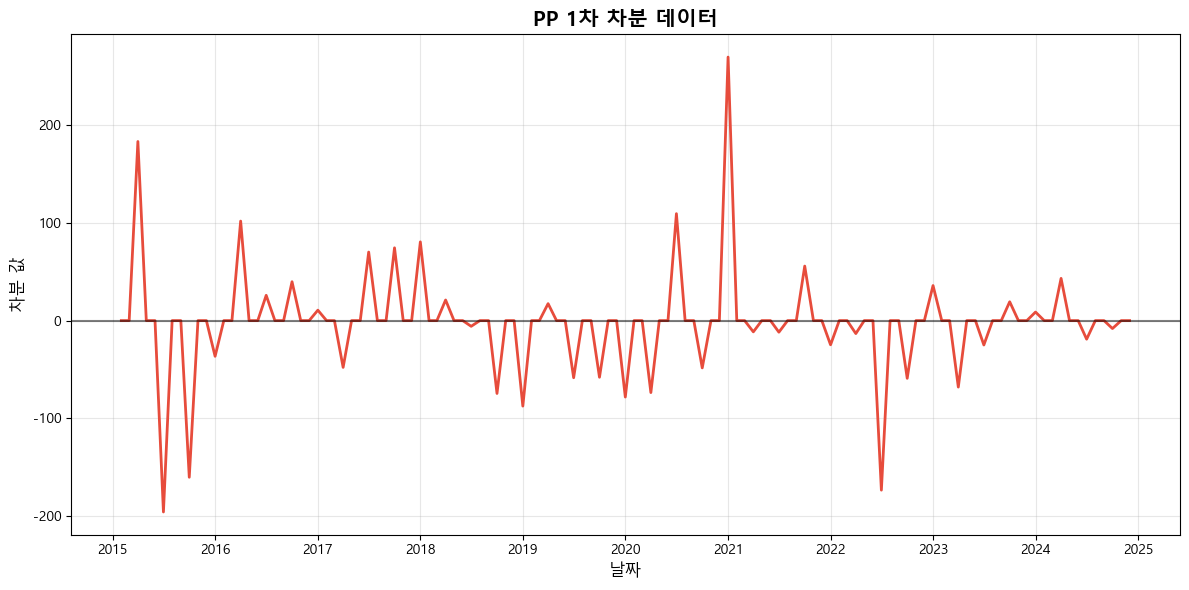


📊 PP 자기상관 분석:


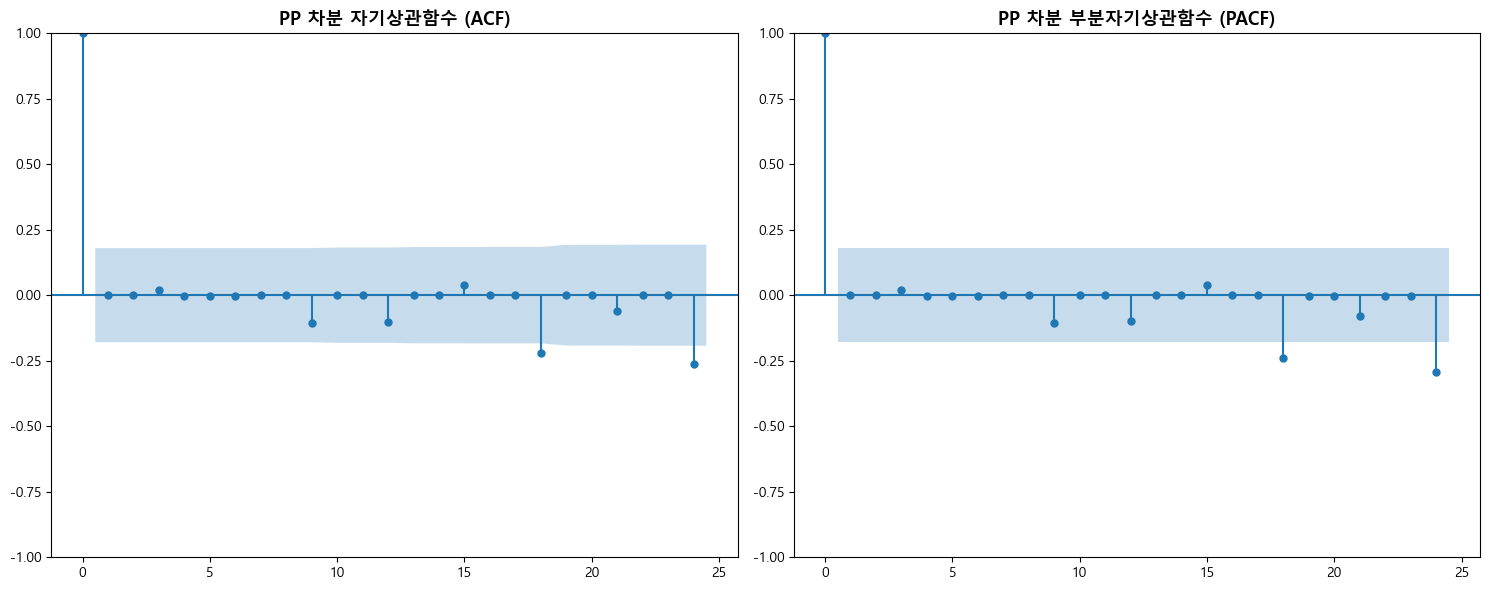

✅ PP 분석 완료!


In [46]:
품목_리스트 = df_oil_long['품목명'].unique()
분해_결과 = {}  # 분해 결과를 저장할 딕셔너리

print(f"\n=== 품목별 개별 시계열 분해 시작 ({len(품목_리스트)}개 품목) ===")

for i, 품목 in enumerate(품목_리스트):
    print(f"\n{'='*50}")
    print(f"📊 {품목} 분석 중... ({i+1}/{len(품목_리스트)})")
    print(f"{'='*50}")
    
    # 해당 품목 데이터 추출
    품목_data = df_oil_long[df_oil_long['품목명'] == 품목]['가격'].copy()
    
    # 기본 통계
    print(f"\n📈 {품목} 기본 통계:")
    print(f"   평균: {품목_data.mean():.2f}")
    print(f"   최솟값: {품목_data.min():.2f} ({품목_data.idxmin().strftime('%Y-%m')})")
    print(f"   최댓값: {품목_data.max():.2f} ({품목_data.idxmax().strftime('%Y-%m')})")
    print(f"   표준편차: {품목_data.std():.2f}")
    print(f"   변동계수: {(품목_data.std()/품목_data.mean()*100):.1f}%")
    
    try:
        # 1. 시계열 분해
        print(f"\n🔍 {품목} 시계열 분해 중...")
        decomposition = seasonal_decompose(품목_data, model='additive', period=12)
        
        # 분해 결과 저장
        분해_결과[품목] = {
            'data': 품목_data,
            'decomposition': decomposition,
            'seasonal_pattern': decomposition.seasonal[-12:].values
        }
        
        # 2. 시계열 분해 시각화
        plt.figure(figsize=(15, 12))
        plt.suptitle(f'{품목} 시계열 분해 결과', fontsize=16, fontweight='bold')
        
        # 원본 데이터
        plt.subplot(411)
        plt.plot(decomposition.observed, color='#2c3e50', linewidth=2)
        plt.title('원본 데이터 (Observed)', fontsize=12, fontweight='bold')
        plt.ylabel('가격', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # 추세
        plt.subplot(412)
        plt.plot(decomposition.trend, color='#e74c3c', linewidth=2)
        plt.title('추세 (Trend)', fontsize=12, fontweight='bold')
        plt.ylabel('추세', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # 계절성
        plt.subplot(413)
        plt.plot(decomposition.seasonal, color='#f39c12', linewidth=2)
        plt.title('계절성 (Seasonal)', fontsize=12, fontweight='bold')
        plt.ylabel('계절성', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # 잔차
        plt.subplot(414)
        plt.plot(decomposition.resid, color='#1abc9c', linewidth=2)
        plt.title('잔차 (Residual)', fontsize=12, fontweight='bold')
        plt.ylabel('잔차', fontsize=10)
        plt.xlabel('날짜', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 3. 계절성 패턴 분석
        seasonal_pattern = decomposition.seasonal[-12:].values
        months = ['1월', '2월', '3월', '4월', '5월', '6월', 
                 '7월', '8월', '9월', '10월', '11월', '12월']
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(months, seasonal_pattern, color='#3498db', alpha=0.8)
        
        # 음수/양수에 따라 색상 변경
        for j, bar in enumerate(bars):
            if seasonal_pattern[j] < 0:
                bar.set_color('#e74c3c')
            else:
                bar.set_color('#27ae60')
        
        plt.title(f'{품목} 월별 계절성 패턴', fontsize=15, fontweight='bold')
        plt.ylabel('계절성 효과', fontsize=12)
        plt.grid(True, alpha=0.3, axis='y')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        # 값 표시
        for j, v in enumerate(seasonal_pattern):
            plt.text(j, v, f'{v:.1f}', ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # 계절성 해석
        max_month_idx = np.argmax(seasonal_pattern)
        min_month_idx = np.argmin(seasonal_pattern)
        
        print(f"\n📅 {품목} 계절성 분석:")
        print(f"   최고점: {months[max_month_idx]} ({seasonal_pattern[max_month_idx]:.2f})")
        print(f"   최저점: {months[min_month_idx]} ({seasonal_pattern[min_month_idx]:.2f})")
        print(f"   계절성 변동폭: {seasonal_pattern.max() - seasonal_pattern.min():.2f}")
        
        # 4. 정상성 검정
        print(f"\n🔬 {품목} 정상성 검정:")
        
        def adf_test_detailed(series, name):
            from statsmodels.tsa.stattools import adfuller
            result = adfuller(series.dropna())
            
            print(f"   ADF 통계량: {result[0]:.6f}")
            print(f"   p-value: {result[1]:.6f}")
            
            if result[1] <= 0.05:
                print(f"   ✅ {name} 정상성을 가짐 (p < 0.05)")
                return True
            else:
                print(f"   ❌ {name} 비정상성을 가짐 (p > 0.05)")
                return False
        
        is_stationary = adf_test_detailed(품목_data, 품목)
        분해_결과[품목]['is_stationary'] = is_stationary
        
        # 5. 차분 적용 (비정상성인 경우)
        if not is_stationary:
            print(f"\n🔄 {품목} 1차 차분 적용:")
            diff_data = 품목_data.diff().dropna()
            분해_결과[품목]['diff_data'] = diff_data
            
            # 차분 후 정상성 재검정
            is_stationary_after_diff = adf_test_detailed(diff_data, f"{품목} 1차 차분")
            분해_결과[품목]['is_stationary_after_diff'] = is_stationary_after_diff
            
            # 차분 데이터 시각화
            plt.figure(figsize=(12, 6))
            plt.plot(diff_data.index, diff_data, color='#e74c3c', linewidth=2)
            plt.title(f'{품목} 1차 차분 데이터', fontsize=15, fontweight='bold')
            plt.xlabel('날짜', fontsize=12)
            plt.ylabel('차분 값', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            plt.tight_layout()
            plt.show()
        
        # 6. 자기상관 분석
        print(f"\n📊 {품목} 자기상관 분석:")
        
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        
        # 분석할 데이터 선택 (정상성 여부에 따라)
        if is_stationary:
            analysis_data = 품목_data
            data_name = f"{품목} 원본"
        else:
            analysis_data = diff_data if not is_stationary else 품목_data
            data_name = f"{품목} 차분"
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(121)
        plot_acf(analysis_data.dropna(), ax=plt.gca(), lags=24, alpha=0.05)
        plt.title(f'{data_name} 자기상관함수 (ACF)', fontsize=13, fontweight='bold')
        
        plt.subplot(122)
        plot_pacf(analysis_data.dropna(), ax=plt.gca(), lags=24, alpha=0.05)
        plt.title(f'{data_name} 부분자기상관함수 (PACF)', fontsize=13, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        분해_결과[품목]['analysis_data'] = analysis_data
        
        print(f"✅ {품목} 분석 완료!")
        
    except Exception as e:
        print(f"❌ {품목} 분석 중 오류 발생: {e}")
        continue

In [47]:
print(f"\n{'='*60}")
print("🎯 전체 분석 결과 요약")
print(f"{'='*60}")

for 품목 in 품목_리스트:
    if 품목 in 분해_결과:
        결과 = 분해_결과[품목]
        seasonal_pattern = 결과['seasonal_pattern']
        
        print(f"\n📊 {품목}:")
        print(f"   평균 가격: {결과['data'].mean():.2f}")
        print(f"   변동성(CV): {(결과['data'].std()/결과['data'].mean()*100):.1f}%")
        print(f"   정상성: {'✅' if 결과['is_stationary'] else '❌'}")
        
        max_month_idx = np.argmax(seasonal_pattern)
        min_month_idx = np.argmin(seasonal_pattern)
        months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
        
        print(f"   최고 계절성: {months[max_month_idx]} ({seasonal_pattern[max_month_idx]:.2f})")
        print(f"   최저 계절성: {months[min_month_idx]} ({seasonal_pattern[min_month_idx]:.2f})")

# 분해 결과를 전역 변수로 저장 (나중에 사용할 수 있도록)
globals()['품목별_분해결과'] = 분해_결과

print(f"\n🎉 모든 품목의 개별 시계열 분해 완료!")
print("분해 결과는 '품목별_분해결과' 변수에 저장되었습니다.")
print("\n다음 단계: 화장품 수출액 데이터와의 상관관계 분석")


🎯 전체 분석 결과 요약

📊 유가:
   평균 가격: 62.08
   변동성(CV): 29.3%
   정상성: ❌
   최고 계절성: 6월 (2.31)
   최저 계절성: 12월 (-3.62)

📊 팜오일:
   평균 가격: 3186.13
   변동성(CV): 33.0%
   정상성: ❌
   최고 계절성: 2월 (185.06)
   최저 계절성: 6월 (-213.52)

📊 나프타:
   평균 가격: 565.91
   변동성(CV): 23.7%
   정상성: ❌
   최고 계절성: 1월 (15.24)
   최저 계절성: 9월 (-10.47)

📊 에틸렌:
   평균 가격: 1001.46
   변동성(CV): 18.8%
   정상성: ❌
   최고 계절성: 3월 (41.76)
   최저 계절성: 10월 (-40.60)

📊 프로필렌:
   평균 가격: 905.11
   변동성(CV): 13.7%
   정상성: ❌
   최고 계절성: 1월 (28.95)
   최저 계절성: 10월 (-29.53)

📊 HDPE:
   평균 가격: 1021.27
   변동성(CV): 13.8%
   정상성: ❌
   최고 계절성: 3월 (19.58)
   최저 계절성: 10월 (-24.56)

📊 PP:
   평균 가격: 1010.94
   변동성(CV): 12.3%
   정상성: ❌
   최고 계절성: 3월 (10.91)
   최저 계절성: 10월 (-20.01)

🎉 모든 품목의 개별 시계열 분해 완료!
분해 결과는 '품목별_분해결과' 변수에 저장되었습니다.

다음 단계: 화장품 수출액 데이터와의 상관관계 분석
